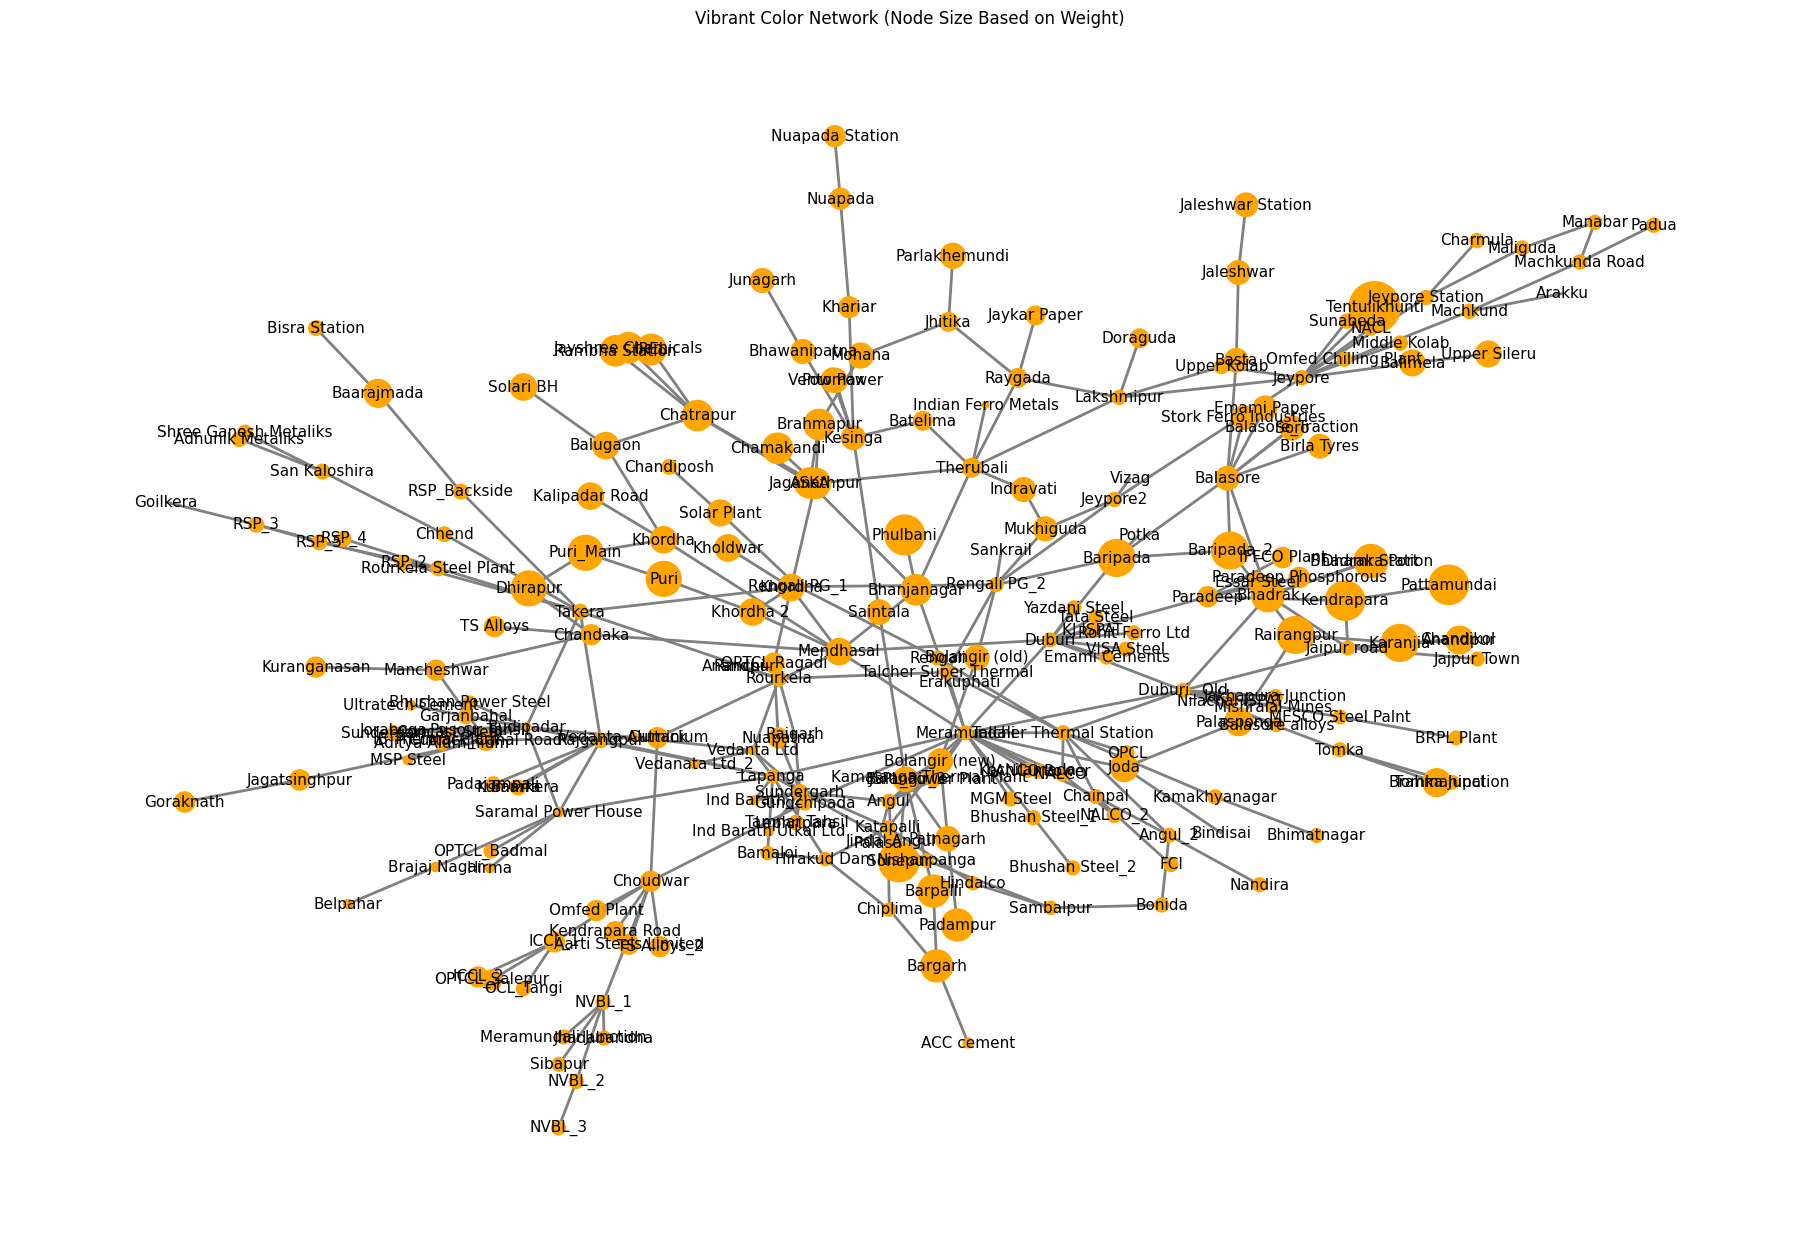

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read node and edge data
node = pd.read_csv('/content/Node_ps - Sheet1.csv')
edge = pd.read_csv('/content/edge_ps - Sheet1.csv')

# Create a graph object
G = nx.Graph()

# Add nodes to the graph
for _, row in node.iterrows():
    G.add_node(row['Id'], label=row['Label'], latitude=row['Latitude'], longitude=row['Longitude'], population=row['Population weight'])

# Add edges to the graph
for _, row in edge.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

# Calculate node size based on population weight
node_size = [data['Population weight'] / 900 for _, data in node.iterrows()]

# Plot the vibrant color network
plt.figure(figsize=(18, 12))

# Calculate layout using spring_layout
pos = nx.spring_layout(G)

# Plot network with vibrant colors and increased node size based on weight
nx.draw(G, pos, labels={node['Id']: node['Label'] for _, node in node.iterrows()}, with_labels=True, node_size=node_size, node_color='orange', font_size=11, edge_color='gray', width=2)
plt.title('Vibrant Color Network (Node Size Based on Weight)')
plt.show()


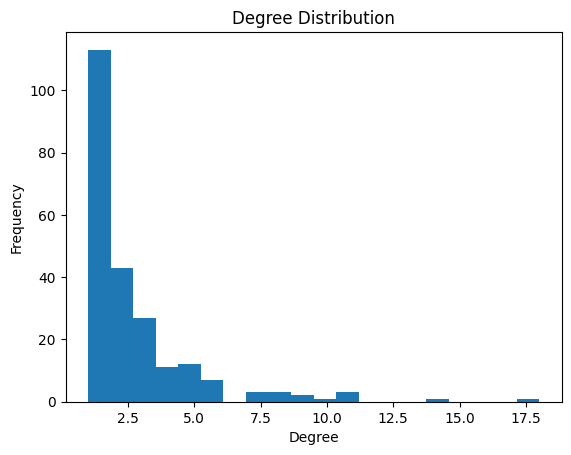

Node	Degree Centrality	Betweenness Centrality	Eigenvector Centrality
1	0.004424778761061947	0.0	0.030190820115414747
2	0.02654867256637168	0.042553916748607	0.16590950846726593
3	0.030973451327433628	0.030843657817109155	0.060833083373043474
4	0.004424778761061947	0.0	0.011070413631725583
5	0.004424778761061947	0.0	0.0002793360967216024
6	0.008849557522123894	0.008849557522123894	0.0015350462618621671
7	0.048672566371681415	0.13628777450016394	0.008156291821625219
8	0.017699115044247787	0.09837758112094395	0.016330081883169718
9	0.008849557522123894	0.0	0.00367064974372616
10	0.022123893805309734	0.06420124549328088	0.012015432421200897
11	0.030973451327433628	0.17010919136582853	0.041489662289374785
12	0.004424778761061947	0.0	0.002186435257760116
13	0.008849557522123894	0.008698131760078665	0.010503976906815293
14	0.022123893805309734	0.17922254998361198	0.15612746273022604
15	0.022123893805309734	0.03295153813737887	0.0233891002970513
16	0.035398230088495575	0.176254155546191	0.2199

In [ ]:
# Degree Distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
plt.hist(degree_sequence, bins=20)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

# Centrality Measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Print centrality measures for a few nodes
print("Node\tDegree Centrality\tBetweenness Centrality\tEigenvector Centrality")
for node in G.nodes():
    print(f"{node}\t{degree_centrality[node]}\t{betweenness_centrality[node]}\t{eigenvector_centrality[node]}")

# Community Detection
communities = nx.community.greedy_modularity_communities(G)
print("Communities:", communities)

# Shortest Paths
shortest_path_lengths = dict(nx.shortest_path_length(G))
average_shortest_path_length = nx.average_shortest_path_length(G)
print("Average Shortest Path Length:", average_shortest_path_length)

# Clustering Coefficient
clustering_coefficient = nx.average_clustering(G)
print("Clustering Coefficient:", clustering_coefficient)


In [ ]:
# Calculate degree centrality for each node
degree_centrality = nx.degree_centrality(G)

# Sort nodes by degree centrality in descending order
sorted_nodes_by_degree = sorted(degree_centrality, key=degree_centrality.get, reverse=True)

# Print nodes with the highest degree centrality
print("Nodes with the Highest Connectivity:")
for node in sorted_nodes_by_degree[:5]:  # Print top 5 nodes with highest connectivity
    print(f"Node {node}: Degree Centrality = {degree_centrality[node]}")


Nodes with the Highest Connectivity:
Node 17: Degree Centrality = 0.07964601769911504
Node 55: Degree Centrality = 0.061946902654867256
Node 7: Degree Centrality = 0.048672566371681415
Node 26: Degree Centrality = 0.048672566371681415
Node 30: Degree Centrality = 0.048672566371681415


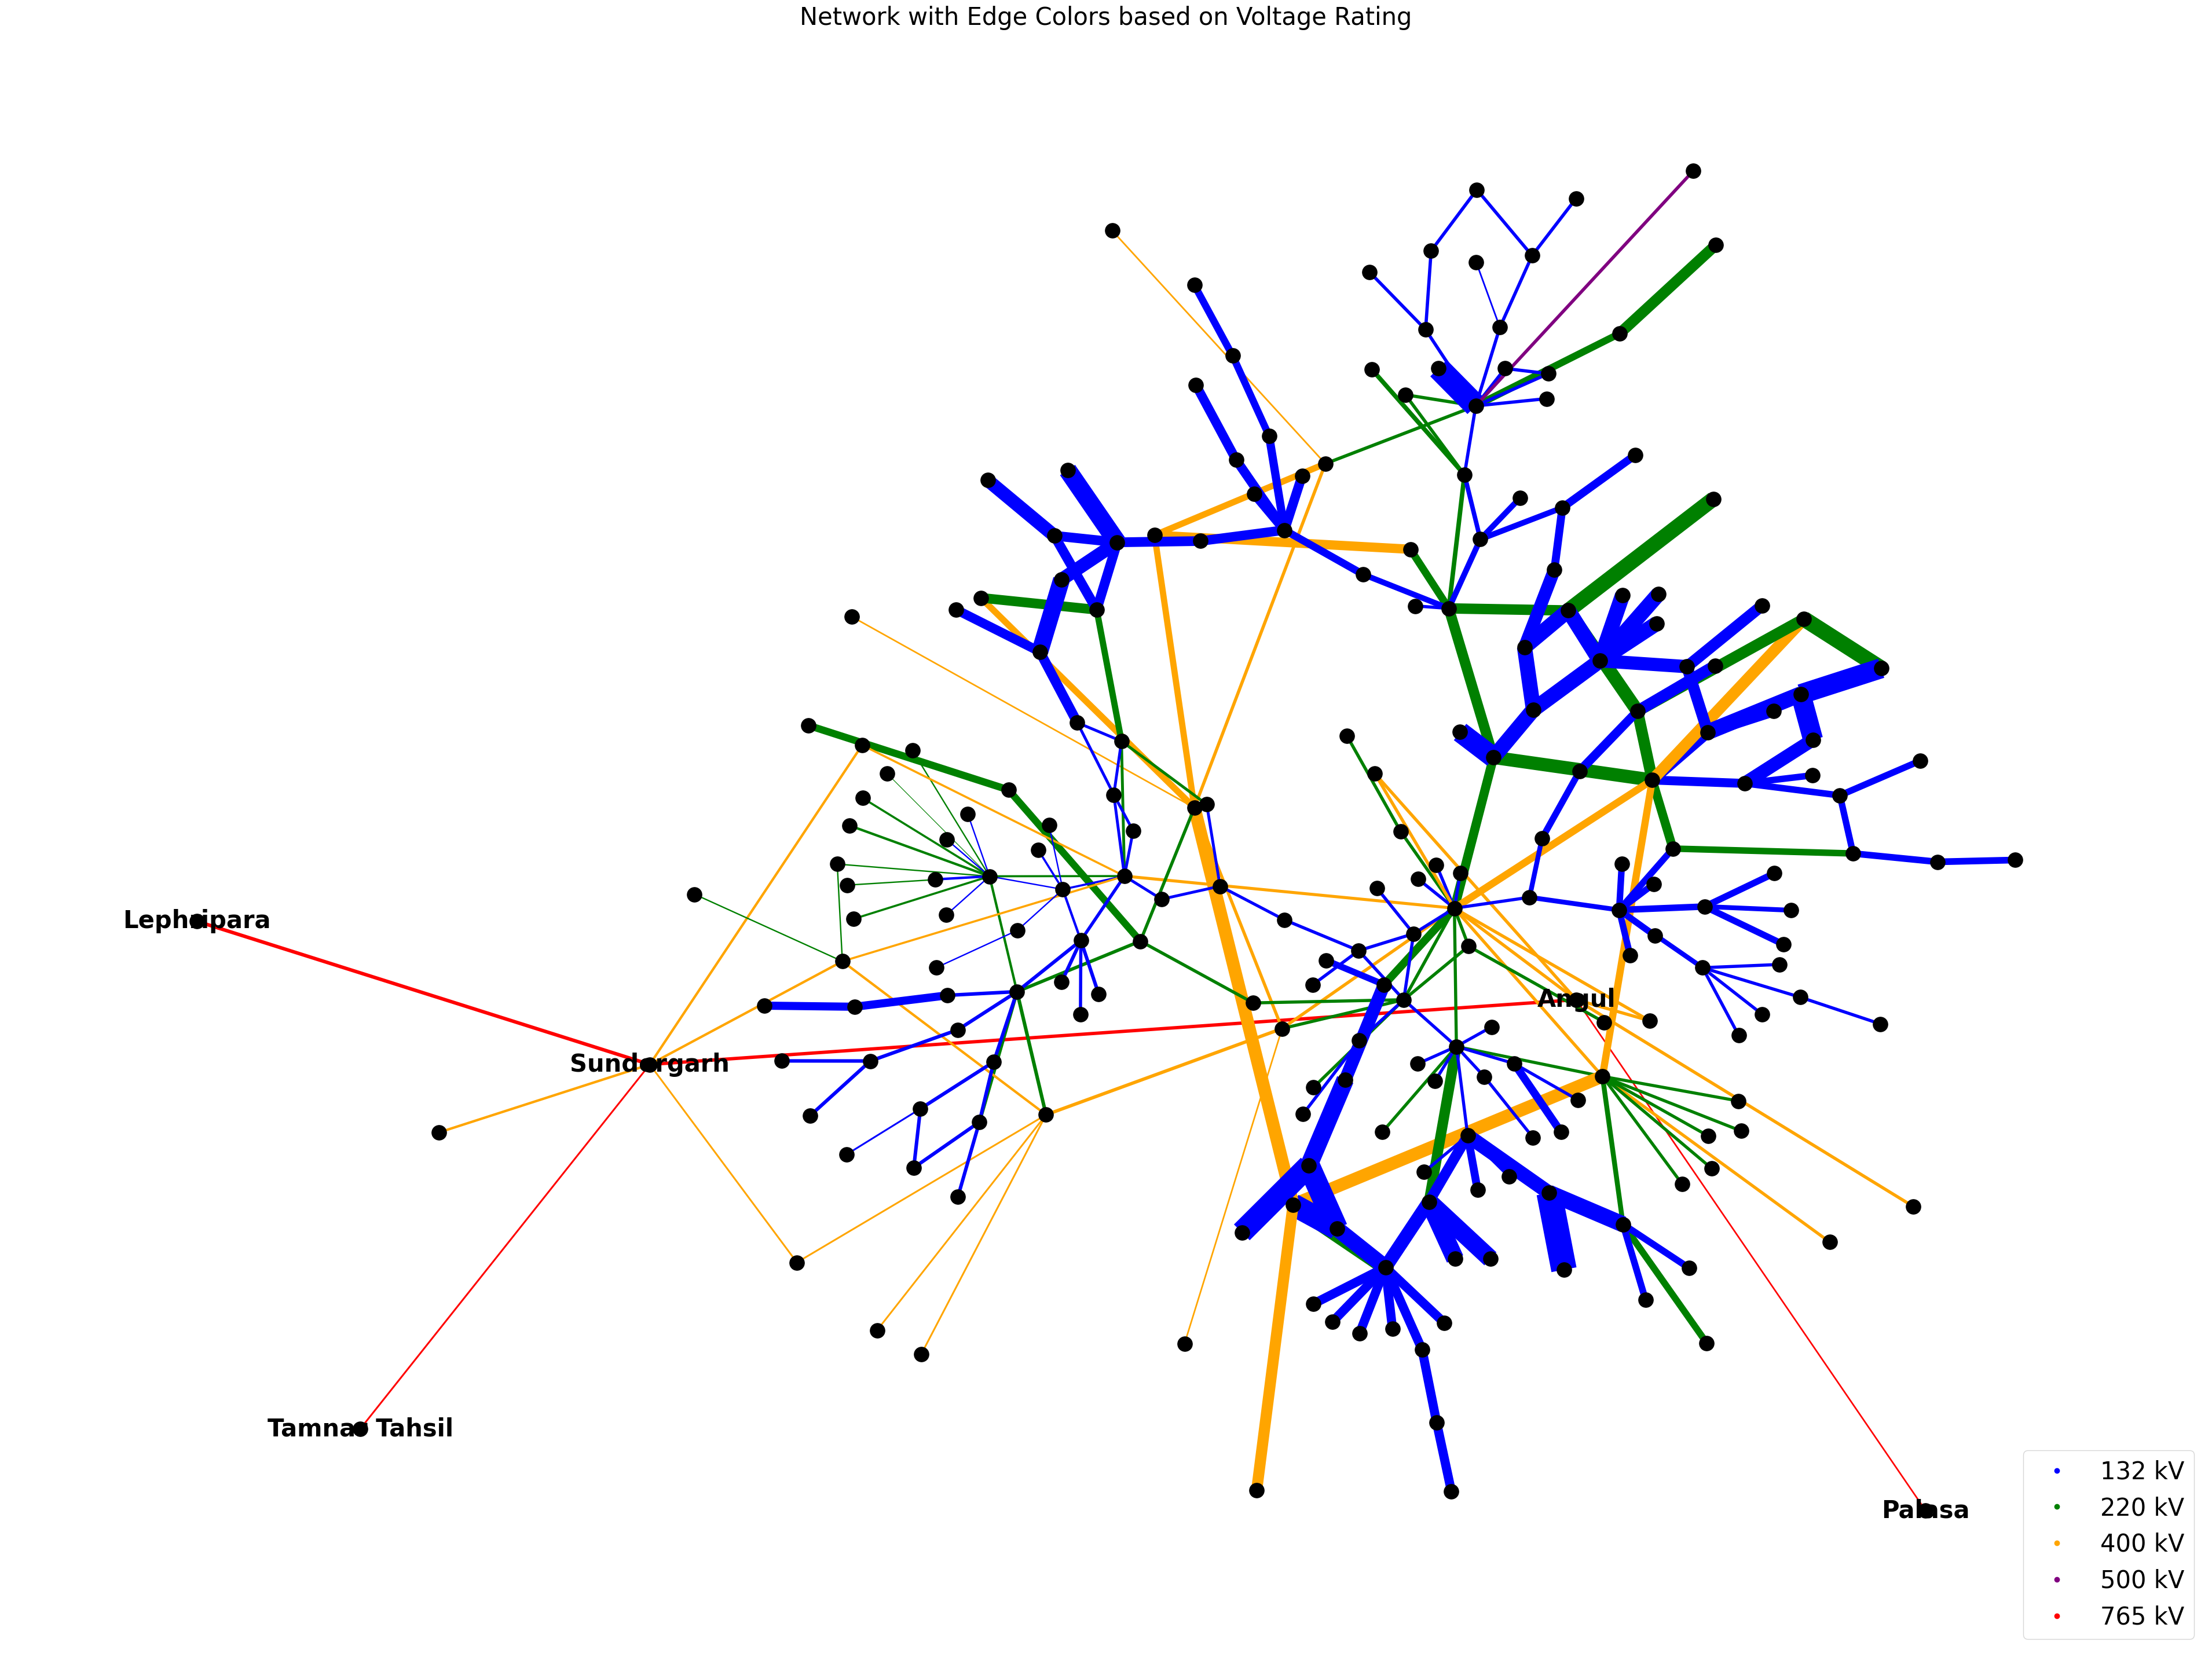

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read node and edge data
node_data = pd.read_csv('/content/Node_ps - Sheet1.csv')
edge_data = pd.read_csv('/content/edge_ps - Sheet1.csv')

# Create a graph object
G = nx.Graph()

# Create a dictionary to store node attributes by ID
node_attributes = {row['Id']: {'label': row['Label'], 'latitude': row['Latitude'], 'longitude': row['Longitude'], 'population': row['Population weight']} for _, row in node_data.iterrows()}

# Add nodes to the graph
G.add_nodes_from(node_attributes.keys())

# Add edges to the graph
for _, row in edge_data.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

# Plot the network
plt.figure(figsize=(38, 28))

# Calculate layout using Kamada-Kawai layout with increased spacing
pos = nx.kamada_kawai_layout(G, scale=3)

# Retrieve edge weights
edge_weights = nx.get_edge_attributes(G, 'weight')

# Define color map for voltage ratings
color_map = {
    132: 'blue',
    220: 'green',
    400: 'orange',
    500: 'purple',
    765: 'red'
}

# Map edge weights to colors based on voltage ratings
edge_colors = [color_map[edge_weight] for edge_weight in edge_weights.values()]

# Get the nodes connected to edges with a voltage rating of 765
nodes_to_label = set()
for edge in G.edges():
    source, target = edge
    if edge_weights[(source, target)] == 765:
        nodes_to_label.add(source)
        nodes_to_label.add(target)

# Calculate edge widths proportional to the population weight
edge_widths = [0.000022 * (node_attributes[edge[0]]['population'] + node_attributes[edge[1]]['population']) for edge in G.edges()]

# Plot network with labels for selected nodes, size based on weight, and edges colored based on voltage rating
nx.draw(G, pos, labels={node: node_attributes[node]['label'] for node in nodes_to_label}, with_labels=True, node_size=330, node_color='black', font_size=30  , font_weight='bold', edge_color=edge_colors, width=edge_widths)

# Create custom legend for voltage ratings
legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=f"{voltage} kV", linestyle='None') for voltage, color in color_map.items()]
plt.legend(handles=legend_elements, loc='lower right', fontsize=30)

plt.title('Network with Edge Colors based on Voltage Rating', fontsize=30)
plt.axis('off')  # Hide axis
plt.show()


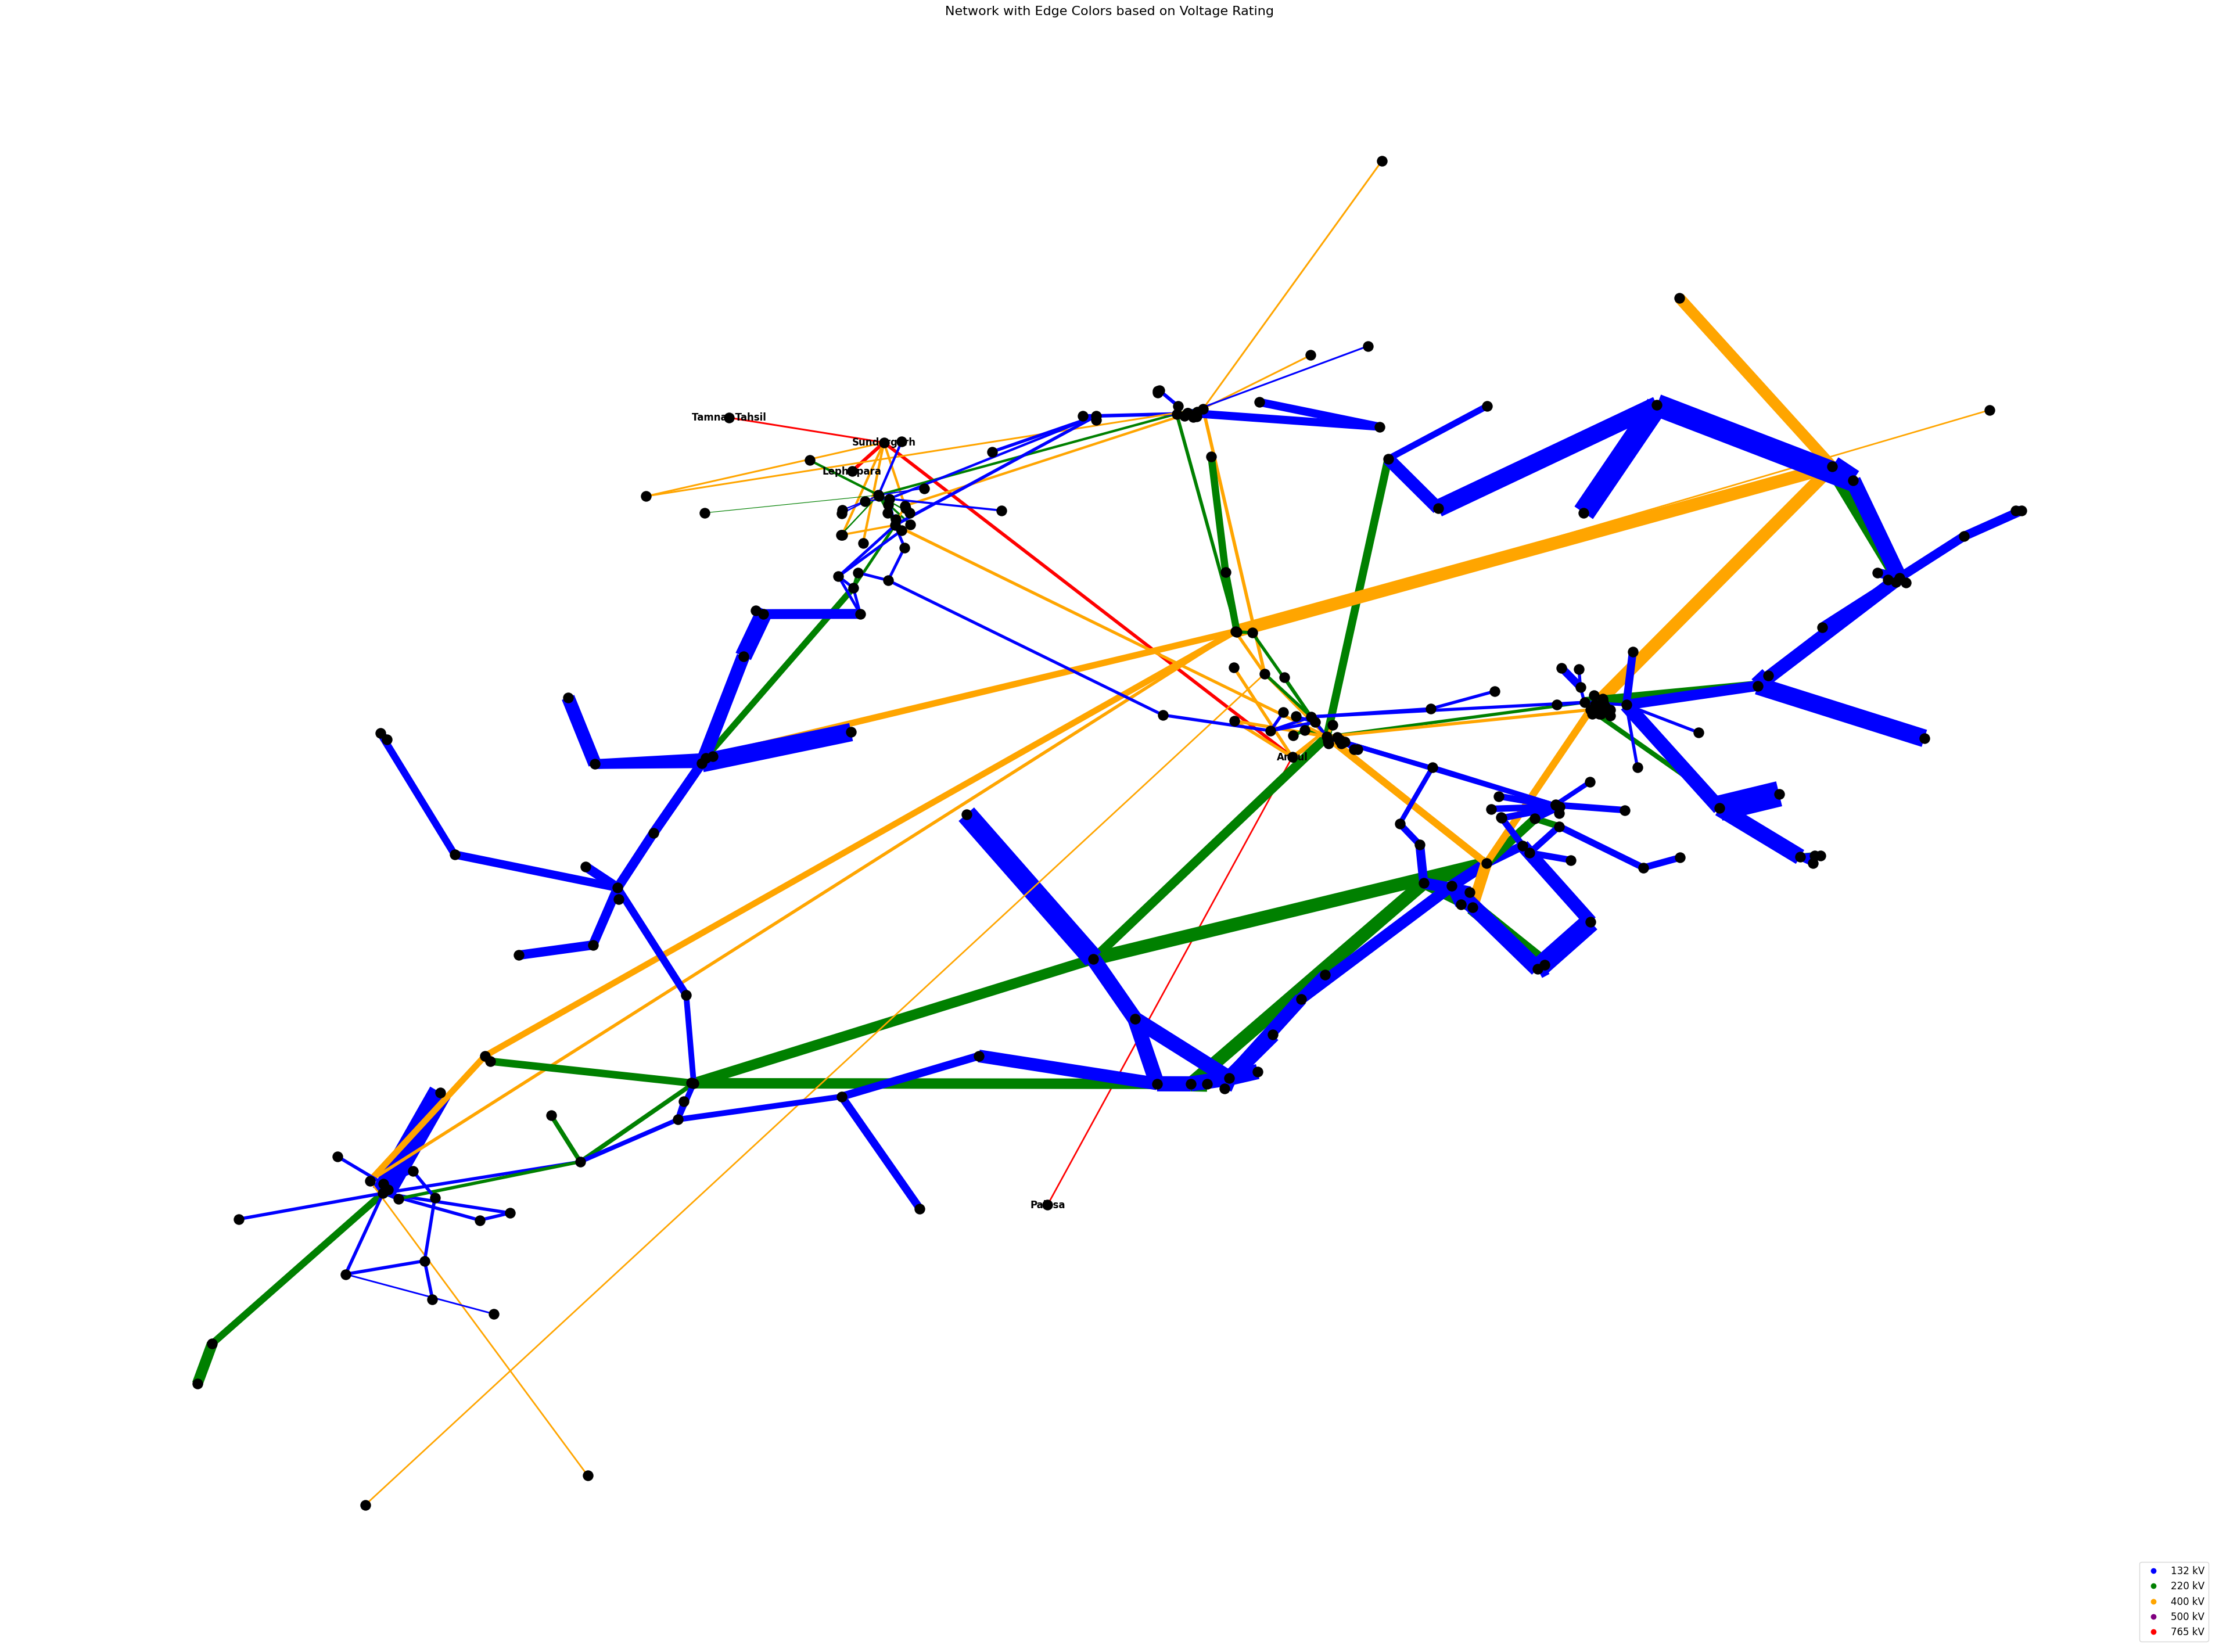

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read node and edge data
node_data = pd.read_csv('/content/Node_ps - Sheet1.csv')
edge_data = pd.read_csv('/content/edge_ps - Sheet1.csv')

# Create a graph object
G = nx.Graph()

# Create a dictionary to store node attributes by ID
node_attributes = {row['Id']: {'label': row['Label'], 'latitude': row['Latitude'], 'longitude': row['Longitude'], 'population': row['Population weight']} for _, row in node_data.iterrows()}

# Add nodes to the graph
G.add_nodes_from(node_attributes.keys())

# Add edges to the graph
for _, row in edge_data.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

# Plot the network
plt.figure(figsize=(38, 28))

# Calculate layout using geographic coordinates
pos = {node_id: (data['longitude'], data['latitude']) for node_id, data in node_attributes.items()}

# Retrieve edge weights
edge_weights = nx.get_edge_attributes(G, 'weight')

# Define color map for voltage ratings
color_map = {
    132: 'blue',
    220: 'green',
    400: 'orange',
    500: 'purple',
    765: 'red'
}

# Map edge weights to colors based on voltage ratings
edge_colors = [color_map[edge_weight] for edge_weight in edge_weights.values()]

# Get the nodes connected to edges with a voltage rating of 765
nodes_to_label = set()
for edge in G.edges():
    source, target = edge
    if edge_weights[(source, target)] == 765:
        nodes_to_label.add(source)
        nodes_to_label.add(target)

# Calculate edge widths proportional to the population weight
edge_widths = [0.000022 * (node_attributes[edge[0]]['population'] + node_attributes[edge[1]]['population']) for edge in G.edges()]

# Plot network with labels for selected nodes, size based on weight, and edges colored based on voltage rating
nx.draw(G, pos, labels={node: node_attributes[node]['label'] for node in nodes_to_label}, with_labels=True, node_size=150, node_color='black', font_size=12, font_weight='bold', edge_color=edge_colors, width=edge_widths)

# Create custom legend for voltage ratings
legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=f"{voltage} kV", linestyle='None') for voltage, color in color_map.items()]
plt.legend(handles=legend_elements, loc='lower right', fontsize=12)

plt.title('Network with Edge Colors based on Voltage Rating', fontsize=16)
plt.axis('off')  # Hide axis
plt.show()


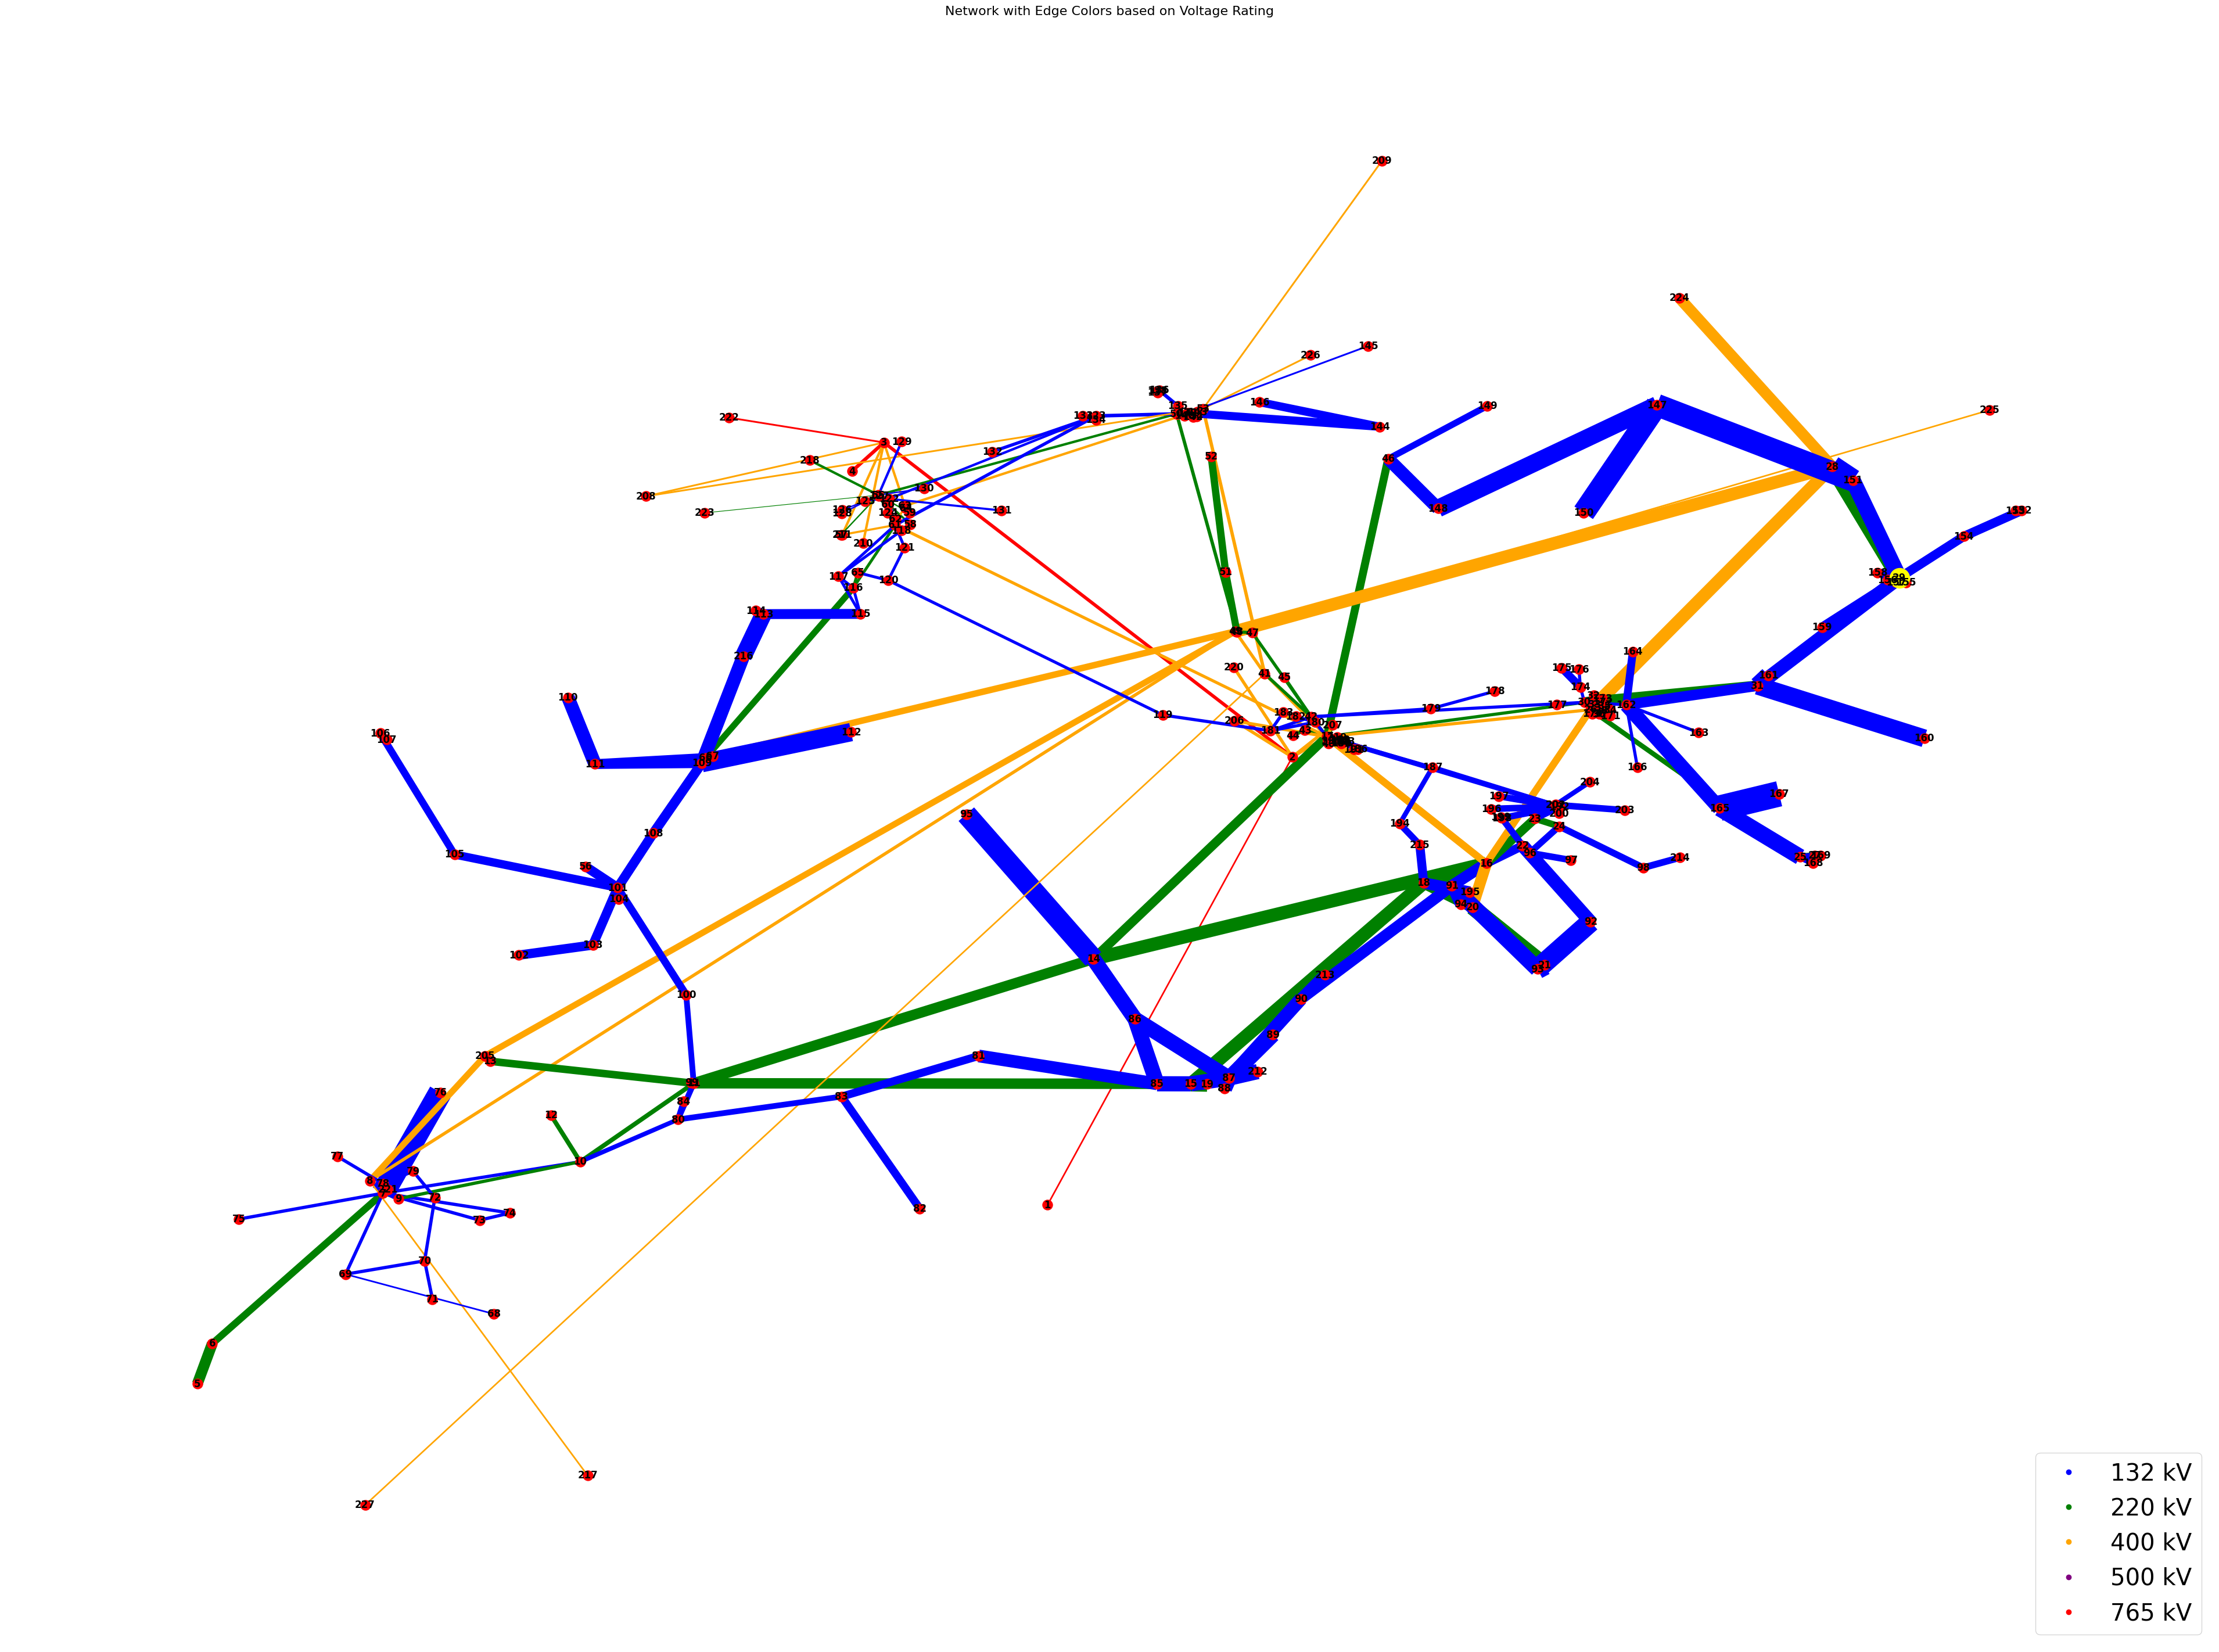

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read node and edge data
node_data = pd.read_csv('/content/Node_ps - Sheet1.csv')
edge_data = pd.read_csv('/content/edge_ps - Sheet1.csv')

# Create a graph object
G = nx.Graph()

# Create a dictionary to store node attributes by ID
node_attributes = {row['Id']: {'label': row['Label'], 'latitude': row['Latitude'], 'longitude': row['Longitude'], 'population': row['Population weight']} for _, row in node_data.iterrows()}

# Add nodes to the graph
G.add_nodes_from(node_attributes.keys())

# Add edges to the graph
for _, row in edge_data.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

# Plot the network
plt.figure(figsize=(38, 28))

# Calculate layout using geographic coordinates
pos = {node_id: (data['longitude'], data['latitude']) for node_id, data in node_attributes.items()}

# Retrieve edge weights
edge_weights = nx.get_edge_attributes(G, 'weight')

# Define color map for voltage ratings
color_map = {
    132: 'blue',
    220: 'green',
    400: 'orange',
    500: 'purple',
    765: 'red'
}

# Map edge weights to colors based on voltage ratings
edge_colors = [color_map[edge_weight] for edge_weight in edge_weights.values()]

# Calculate edge widths proportional to the population weight
edge_widths = [0.000022 * (node_attributes[edge[0]]['population'] + node_attributes[edge[1]]['population']) for edge in G.edges()]

# Plot network with labels for all nodes, size based on weight, and edges colored based on voltage rating
nx.draw(G, pos, labels={node: f"{node}" for node in G.nodes()}, with_labels=True, node_size=150, node_color='red', font_size=12, font_weight='bold', edge_color=edge_colors, width=edge_widths)

# Highlight node with ID 17
nx.draw_networkx_nodes(G, pos, nodelist=[29], node_size=600, node_color='yellow', label='17')

# Create custom legend for voltage ratings
legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=f"{voltage} kV", linestyle='None') for voltage, color in color_map.items()]
plt.legend(handles=legend_elements, loc='lower right', fontsize=29)

plt.title('Network with Edge Colors based on Voltage Rating', fontsize=16)
plt.axis('off')  # Hide axis
plt.show()


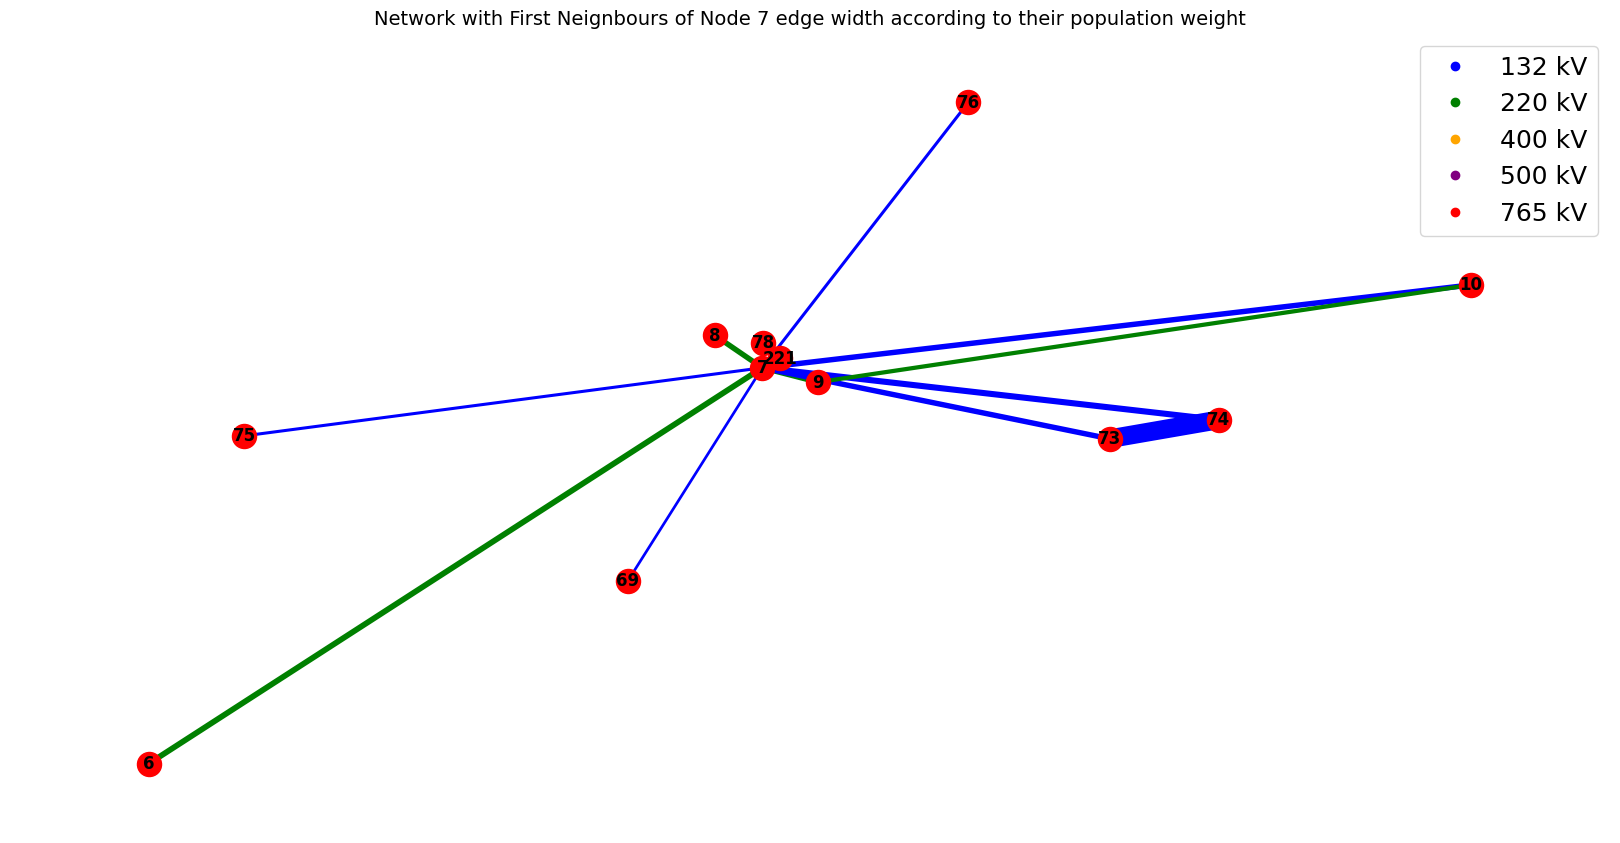

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read node and edge data
node_data = pd.read_csv('/content/Node_ps - Sheet1.csv')
edge_data = pd.read_csv('/content/edge_ps - Sheet1.csv')

# Create a graph object
G = nx.Graph()

# Create a dictionary to store node attributes by ID
node_attributes = {row['Id']: {'label': row['Label'], 'latitude': row['Latitude'], 'longitude': row['Longitude'], 'population': row['Population weight']} for _, row in node_data.iterrows()}

# Add nodes to the graph
G.add_nodes_from(node_attributes.keys())

# Add edges to the graph
for _, row in edge_data.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

# Filter nodes connected to node 3 and their edges
connected_nodes = list(G.neighbors(7))
subgraph = G.subgraph(connected_nodes + [7])

# Plot the subgraph
plt.figure(figsize=(16, 8))

# Calculate layout using geographic coordinates
pos = {node_id: (data['longitude'], data['latitude']) for node_id, data in node_attributes.items() if node_id in subgraph.nodes()}

# Retrieve edge weights
edge_weights = nx.get_edge_attributes(subgraph, 'weight')

# Define color map for voltage ratings
color_map = {
    132: 'blue',
    220: 'green',
    400: 'orange',
    500: 'purple',
    765: 'red'
}

# Map edge weights to colors based on voltage ratings
edge_colors = [color_map[edge_weights[edge]] for edge in subgraph.edges()]

# Retrieve population weights for edges
edge_population_weights = nx.get_edge_attributes(subgraph, 'weight')

# Set edge width based on population weight
edge_widths = [0.000022 * (node_attributes[edge[0]]['population'] + node_attributes[edge[1]]['population']) for edge in G.edges()]

# Plot nodes and edges with colors and widths
nx.draw(subgraph, pos, with_labels=True, node_size=300, node_color='red', font_size=12, font_weight='bold', edge_color=edge_colors, width=edge_widths)

# Create custom legend for voltage ratings
legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=f"{voltage} kV", linestyle='None') for voltage, color in color_map.items()]
plt.legend(handles=legend_elements, loc='upper right', fontsize=18)

plt.title('Network with First Neignbours of Node 7 edge width according to their population weight', fontsize=14)
plt.axis('off')  # Hide axis
plt.show()


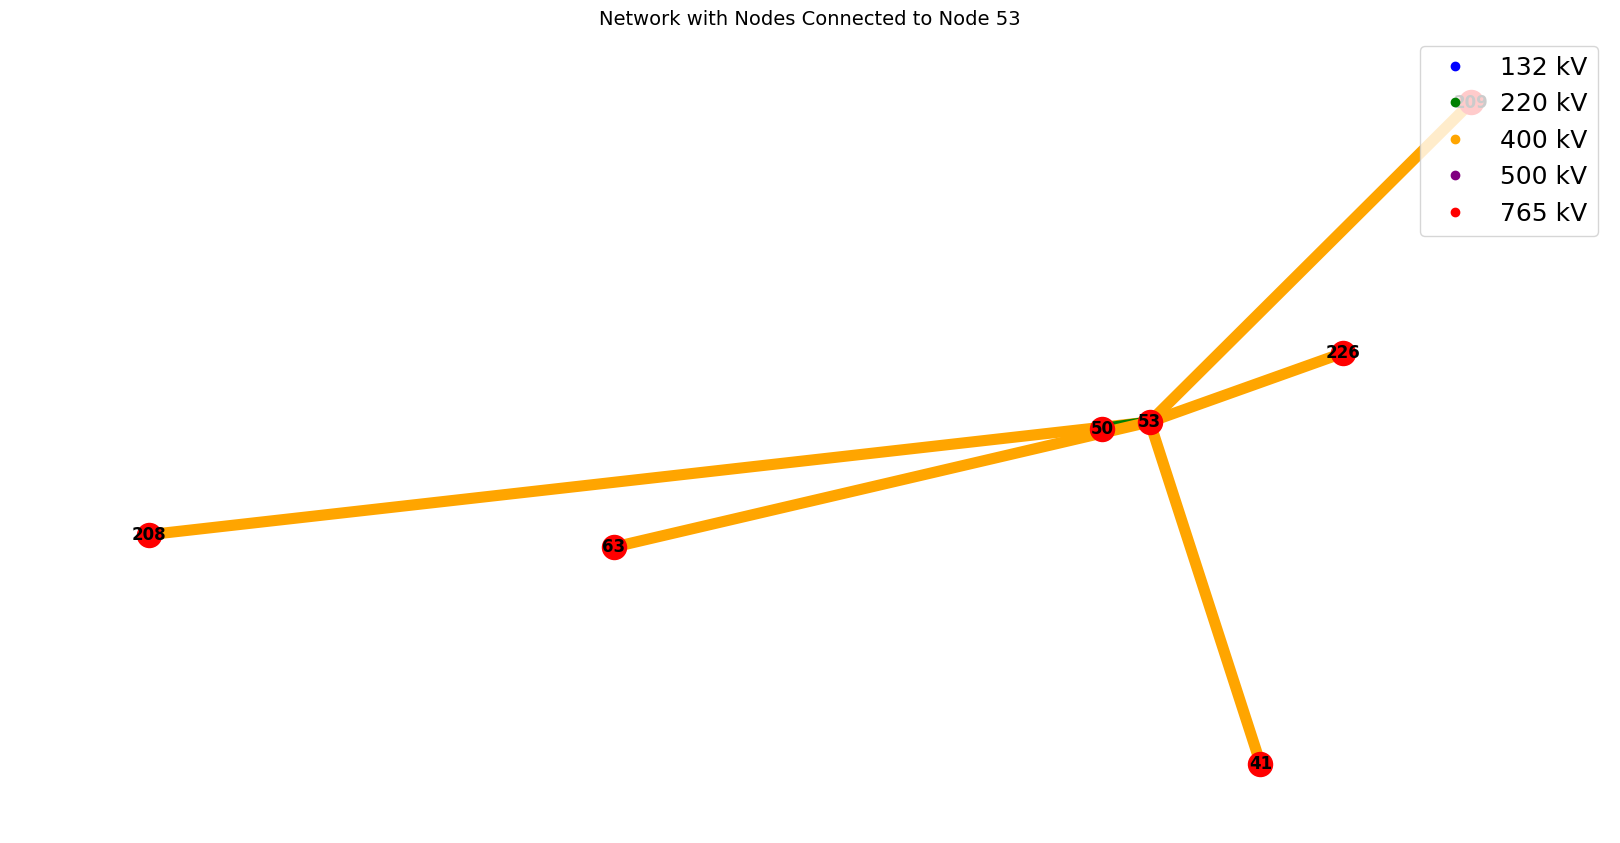

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read node and edge data
node_data = pd.read_csv('/content/Node_ps - Sheet1.csv')
edge_data = pd.read_csv('/content/edge_ps - Sheet1.csv')

# Create a graph object
G = nx.Graph()

# Create a dictionary to store node attributes by ID
node_attributes = {row['Id']: {'label': row['Label'], 'latitude': row['Latitude'], 'longitude': row['Longitude'], 'population': row['Population weight']} for _, row in node_data.iterrows()}

# Add nodes to the graph
G.add_nodes_from(node_attributes.keys())

# Add edges to the graph
for _, row in edge_data.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

# Filter nodes connected to node 3 and their edges
connected_nodes = list(G.neighbors(53))
subgraph = G.subgraph(connected_nodes + [53])

# Plot the subgraph
plt.figure(figsize=(16, 8))

# Calculate layout using geographic coordinates
pos = {node_id: (data['longitude'], data['latitude']) for node_id, data in node_attributes.items() if node_id in subgraph.nodes()}

# Retrieve edge weights
edge_weights = nx.get_edge_attributes(subgraph, 'weight')

# Define color map for voltage ratings
color_map = {
    132: 'blue',
    220: 'green',
    400: 'orange',
    500: 'purple',
    765: 'red'
}

# Map edge weights to colors based on voltage ratings
edge_colors = [color_map[edge_weights[edge]] for edge in subgraph.edges()]

# Plot nodes and edges with colors
nx.draw(subgraph, pos, with_labels=True, node_size=300, node_color='red', font_size=12, font_weight='bold', edge_color=edge_colors,width=8)

# Create custom legend for voltage ratings
legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=f"{voltage} kV", linestyle='None') for voltage, color in color_map.items()]
plt.legend(handles=legend_elements, loc='upper right', fontsize=18)

plt.title('Network with Nodes Connected to Node 53', fontsize=14)
plt.axis('off')  # Hide axis
plt.show()


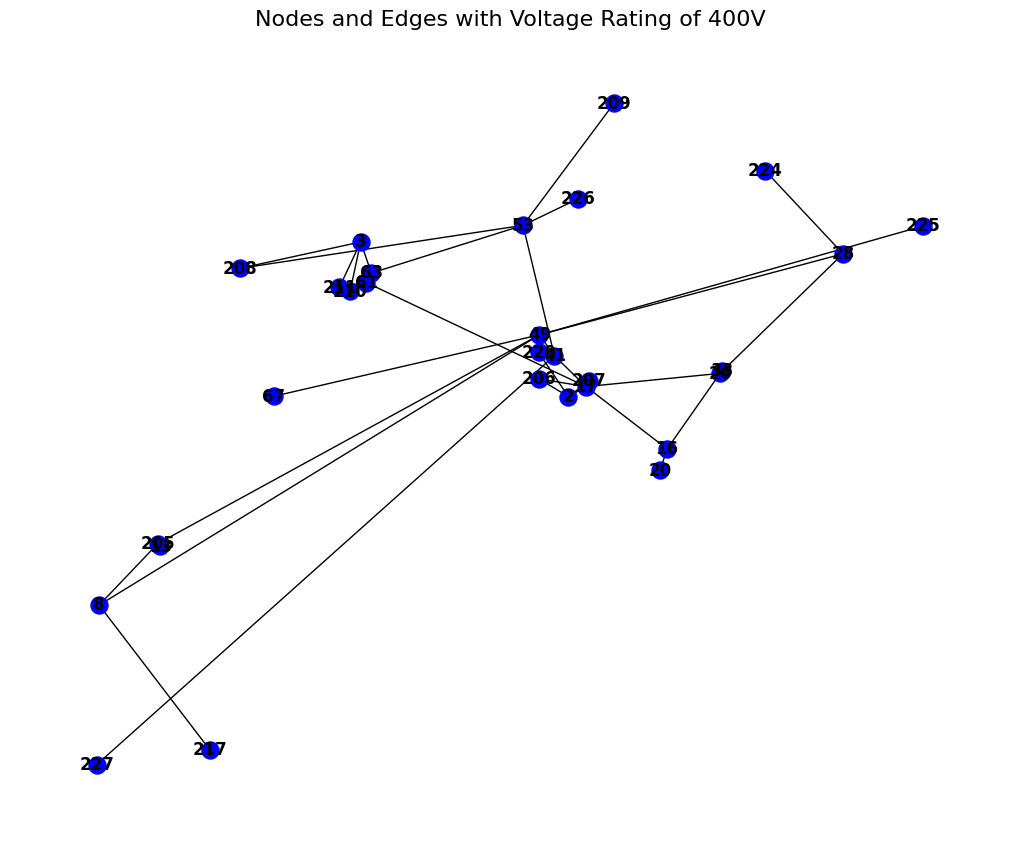

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read node and edge data
node_data = pd.read_csv('/content/Node_ps - Sheet1.csv')
edge_data = pd.read_csv('/content/edge_ps - Sheet1.csv')

# Create a graph object
G = nx.Graph()

# Create a dictionary to store node attributes by ID
node_attributes = {row['Id']: {'label': row['Label'], 'latitude': row['Latitude'], 'longitude': row['Longitude'], 'population': row['Population weight']} for _, row in node_data.iterrows()}

# Add nodes to the graph
G.add_nodes_from(node_attributes.keys())

# Add edges to the graph
for _, row in edge_data.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

# Filter edges with a voltage rating of 500
edges_500 = [(source, target) for source, target, weight in G.edges(data='weight') if weight == 400]

# Create a subgraph containing nodes with edges of rating 500
subgraph = G.edge_subgraph(edges_500)

# Plot the subgraph
plt.figure(figsize=(10, 8))

# Calculate layout using geographic coordinates
pos = {node_id: (data['longitude'], data['latitude']) for node_id, data in node_attributes.items() if node_id in subgraph.nodes()}

# Plot nodes and edges
nx.draw(subgraph, pos, with_labels=True, node_size=150, node_color='blue', font_size=12, font_weight='bold')

plt.title('Nodes and Edges with Voltage Rating of 400V', fontsize=16)
plt.axis('off')  # Hide axis
plt.show()



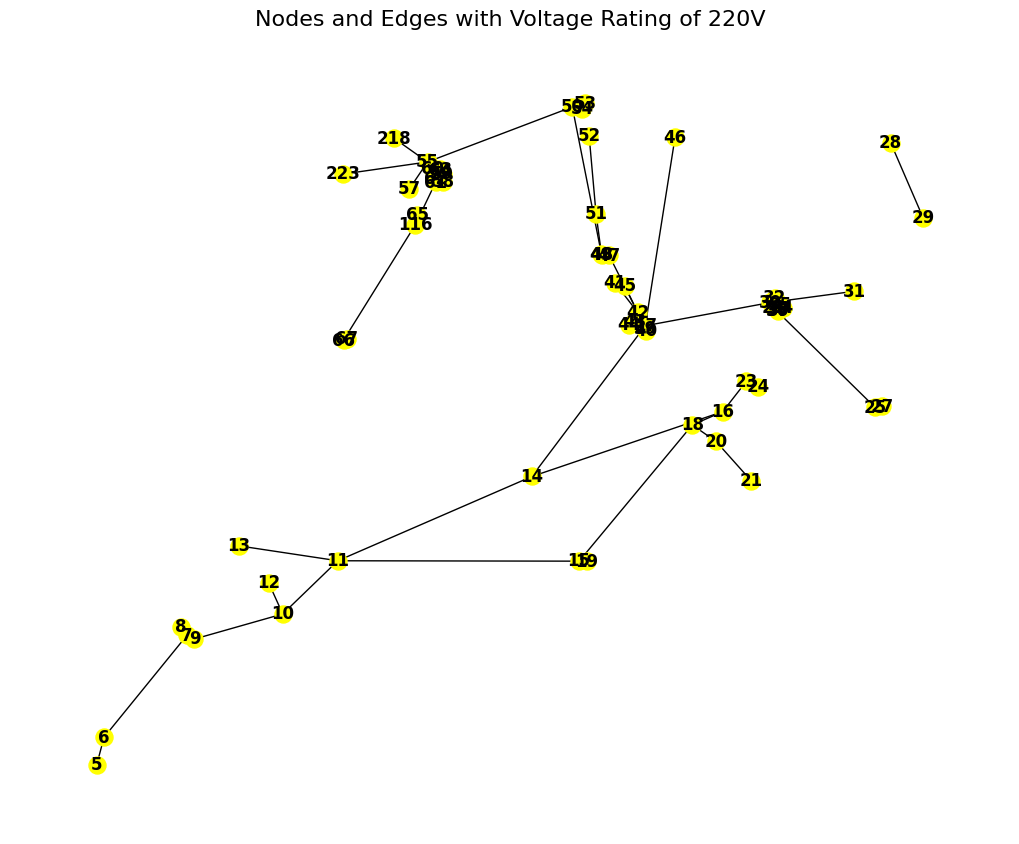

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read node and edge data
node_data = pd.read_csv('/content/Node_ps - Sheet1.csv')
edge_data = pd.read_csv('/content/edge_ps - Sheet1.csv')

# Create a graph object
G = nx.Graph()

# Create a dictionary to store node attributes by ID
node_attributes = {row['Id']: {'label': row['Label'], 'latitude': row['Latitude'], 'longitude': row['Longitude'], 'population': row['Population weight']} for _, row in node_data.iterrows()}

# Add nodes to the graph
G.add_nodes_from(node_attributes.keys())

# Add edges to the graph
for _, row in edge_data.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

# Filter edges with a voltage rating of 500
edges_500 = [(source, target) for source, target, weight in G.edges(data='weight') if weight == 220]

# Create a subgraph containing nodes with edges of rating 500
subgraph = G.edge_subgraph(edges_500)

# Plot the subgraph
plt.figure(figsize=(10, 8))

# Calculate layout using geographic coordinates
pos = {node_id: (data['longitude'], data['latitude']) for node_id, data in node_attributes.items() if node_id in subgraph.nodes()}

# Plot nodes and edges
nx.draw(subgraph, pos, with_labels=True, node_size=150, node_color='yellow', font_size=12, font_weight='bold')

plt.title('Nodes and Edges with Voltage Rating of 220V', fontsize=16)
plt.axis('off')  # Hide axis
plt.show()



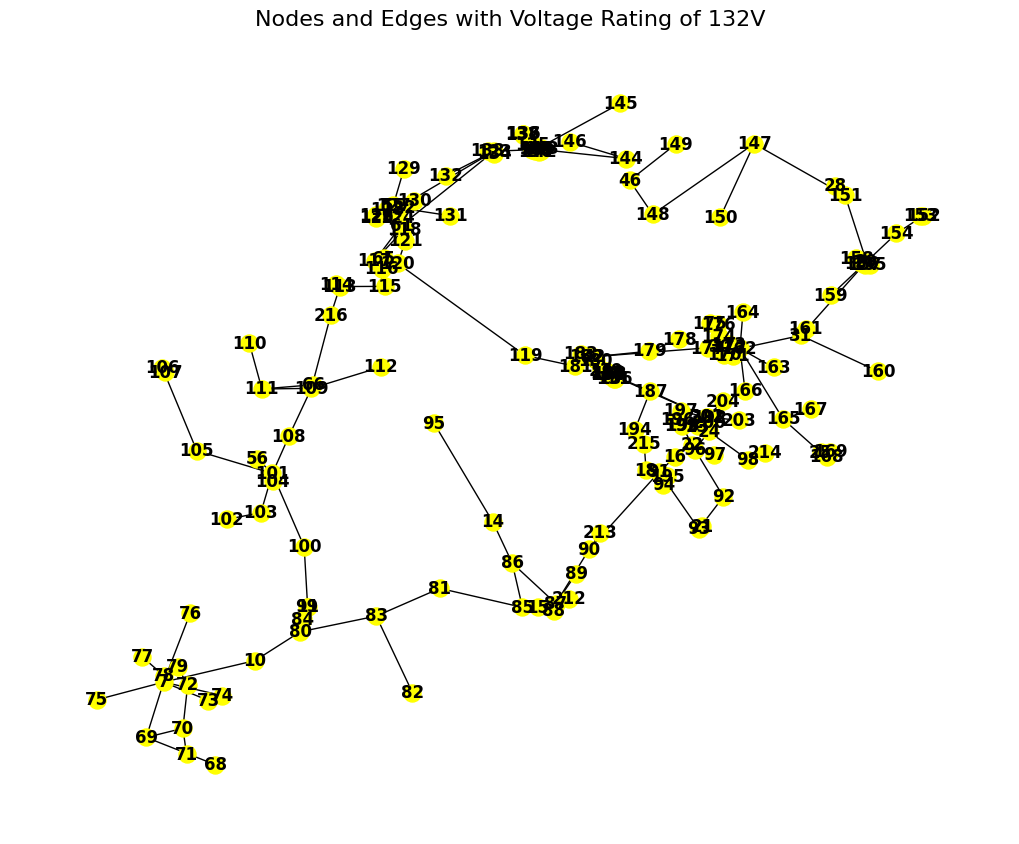

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read node and edge data
node_data = pd.read_csv('/content/Node_ps - Sheet1.csv')
edge_data = pd.read_csv('/content/edge_ps - Sheet1.csv')

# Create a graph object
G = nx.Graph()

# Create a dictionary to store node attributes by ID
node_attributes = {row['Id']: {'label': row['Label'], 'latitude': row['Latitude'], 'longitude': row['Longitude'], 'population': row['Population weight']} for _, row in node_data.iterrows()}

# Add nodes to the graph
G.add_nodes_from(node_attributes.keys())

# Add edges to the graph
for _, row in edge_data.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

# Filter edges with a voltage rating of 500
edges_500 = [(source, target) for source, target, weight in G.edges(data='weight') if weight == 132]

# Create a subgraph containing nodes with edges of rating 500
subgraph = G.edge_subgraph(edges_500)

# Plot the subgraph
plt.figure(figsize=(10, 8))

# Calculate layout using geographic coordinates
pos = {node_id: (data['longitude'], data['latitude']) for node_id, data in node_attributes.items() if node_id in subgraph.nodes()}

# Plot nodes and edges
nx.draw(subgraph, pos, with_labels=True, node_size=150, node_color='yellow', font_size=12, font_weight='bold')

plt.title('Nodes and Edges with Voltage Rating of 132V', fontsize=16)
plt.axis('off')  # Hide axis
plt.show()



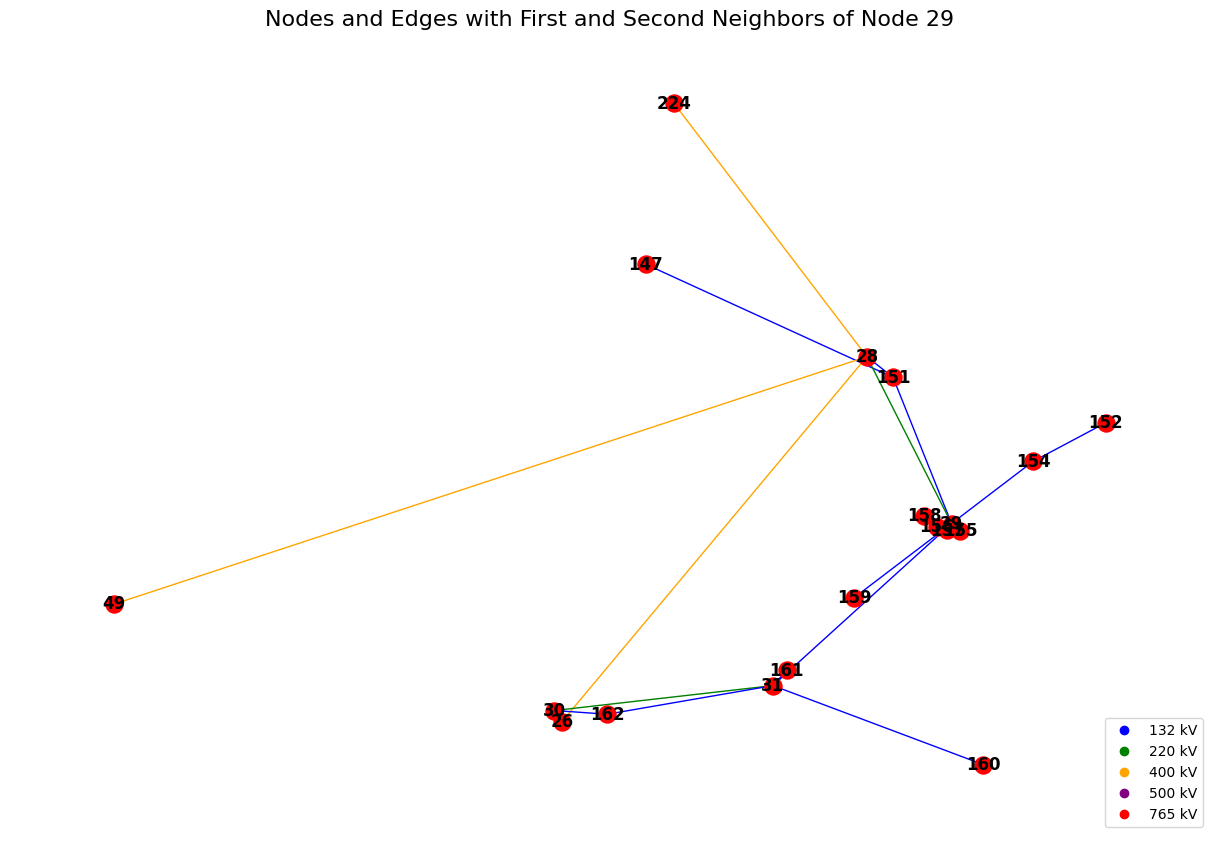

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read node and edge data
node_data = pd.read_csv('/content/Node_ps - Sheet1.csv')
edge_data = pd.read_csv('/content/edge_ps - Sheet1.csv')

# Create a graph object
G = nx.Graph()

# Create a dictionary to store node attributes by ID
node_attributes = {row['Id']: {'label': row['Label'], 'latitude': row['Latitude'], 'longitude': row['Longitude'], 'population': row['Population weight']} for _, row in node_data.iterrows()}

# Add nodes to the graph
G.add_nodes_from(node_attributes.keys())

# Add edges to the graph
for _, row in edge_data.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

# Get the first and second neighbors of node 29
first_neighbors = list(G.neighbors(29))
second_neighbors = [n for n in nx.single_source_shortest_path_length(G, 29, cutoff=2) if n not in first_neighbors and n != 29]

# Create a subgraph containing the first and second neighbors of node 29
subgraph_nodes = set(first_neighbors + second_neighbors + [29])
subgraph = G.subgraph(subgraph_nodes)

# Plot the subgraph
plt.figure(figsize=(12, 8))

# Calculate layout using geographic coordinates
pos = {node_id: (data['longitude'], data['latitude']) for node_id, data in node_attributes.items() if node_id in subgraph.nodes()}

# Retrieve edge weights
edge_weights = nx.get_edge_attributes(subgraph, 'weight')

# Define color map for voltage ratings
color_map = {
    132: 'blue',
    220: 'green',
    400: 'orange',
    500: 'purple',
    765: 'red'
}

# Map edge weights to colors based on voltage ratings
edge_colors = [color_map[edge_weights[edge]] for edge in subgraph.edges()]

# Plot network with labels for all nodes, size based on weight, and edges colored based on voltage rating
nx.draw(subgraph, pos, labels={node: f"{node}" for node in subgraph.nodes()}, with_labels=True, node_size=150, node_color='red', font_size=12, font_weight='bold', edge_color=edge_colors)

# Create custom legend for voltage ratings
legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=f"{voltage} kV", linestyle='None') for voltage, color in color_map.items()]
plt.legend(handles=legend_elements, loc='lower right', fontsize=10)

plt.title('Nodes and Edges with First and Second Neighbors of Node 29', fontsize=16)
plt.axis('off')  # Hide axis
plt.show()


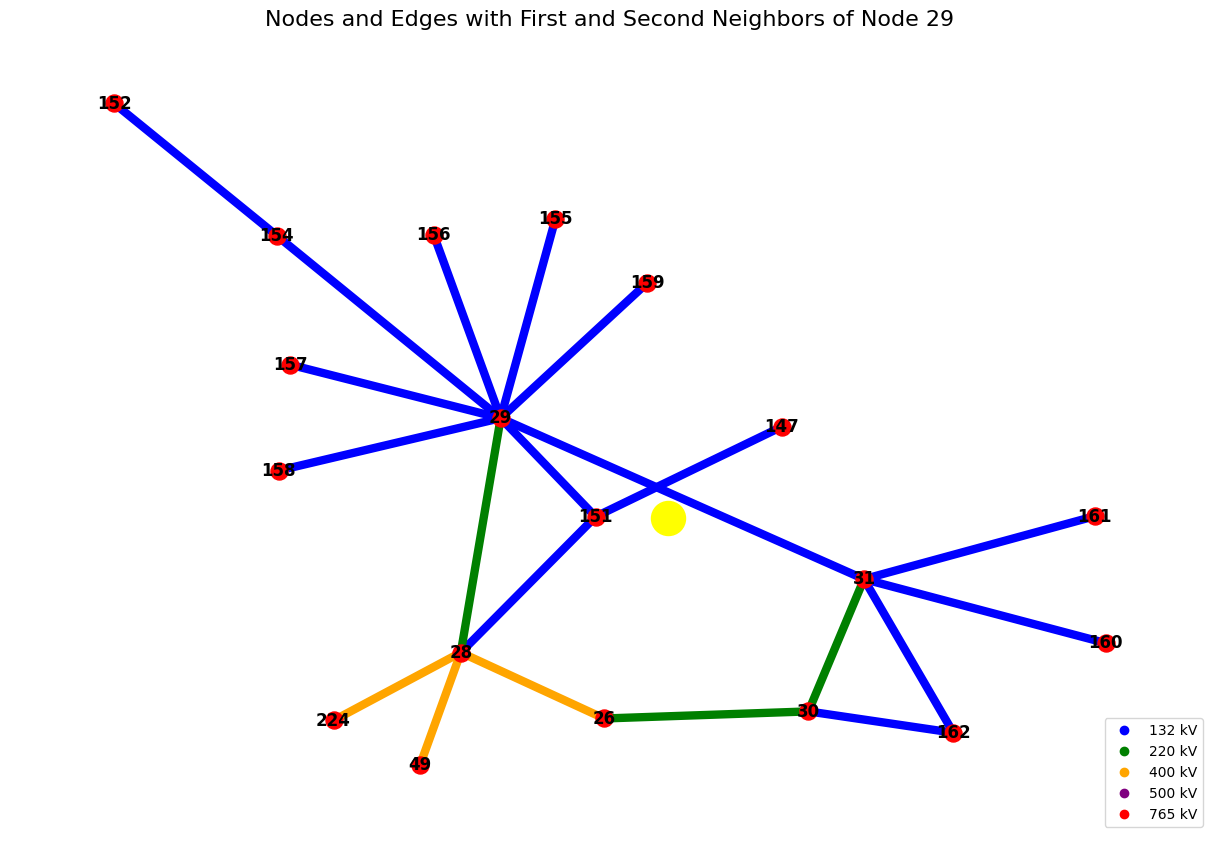

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read node and edge data
node_data = pd.read_csv('/content/Node_ps - Sheet1.csv')
edge_data = pd.read_csv('/content/edge_ps - Sheet1.csv')

# Create a graph object
G = nx.Graph()

# Create a dictionary to store node attributes by ID
node_attributes = {row['Id']: {'label': row['Label'], 'latitude': row['Latitude'], 'longitude': row['Longitude'], 'population': row['Population weight']} for _, row in node_data.iterrows()}

# Add nodes to the graph
G.add_nodes_from(node_attributes.keys())

# Add edges to the graph
for _, row in edge_data.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

# Get the first and second neighbors of node 29
first_neighbors = list(G.neighbors(29))
second_neighbors = [n for n in nx.single_source_shortest_path_length(G, 29, cutoff=2) if n not in first_neighbors and n != 29]

# Create a subgraph containing the first and second neighbors of node 29
subgraph_nodes = set(first_neighbors + second_neighbors + [29])
subgraph = G.subgraph(subgraph_nodes)

# Plot the subgraph
plt.figure(figsize=(12, 8))

# Retrieve edge weights
edge_weights = nx.get_edge_attributes(subgraph, 'weight')

# Define color map for voltage ratings
color_map = {
    132: 'blue',
    220: 'green',
    400: 'orange',
    500: 'purple',
    765: 'red'
}

# Map edge weights to colors based on voltage ratings
edge_colors = [color_map[edge_weights[edge]] for edge in subgraph.edges()]

# Plot network with labels for all nodes, size based on weight, and edges colored based on voltage rating
nx.draw(subgraph, with_labels=True, labels={node: f"{node}" for node in subgraph.nodes()}, node_size=150, node_color='red', font_size=12, font_weight='bold', edge_color=edge_colors,width=6)

# Highlight node 29
nx.draw_networkx_nodes(subgraph, pos=nx.spring_layout(subgraph), nodelist=[29], node_size=600, node_color='yellow')

# Create custom legend for voltage ratings
legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=f"{voltage} kV", linestyle='None') for voltage, color in color_map.items()]
plt.legend(handles=legend_elements, loc='lower right', fontsize=10)

plt.title('Nodes and Edges with First and Second Neighbors of Node 29', fontsize=16)
plt.axis('off')  # Hide axis
plt.show()


In [ ]:
import pandas as pd
import networkx as nx

# Read node data
node_data = pd.read_csv('/content/Node_ps - Sheet1.csv')

# Create a graph object
G = nx.Graph()

# Create a dictionary to store node attributes by ID
node_attributes = {row['Id']: {'label': row['Label'], 'population': row['Population weight']} for _, row in node_data.iterrows()}

# Add nodes to the graph
G.add_nodes_from(node_attributes.keys())

# Read edge data
edge_data = pd.read_csv('/content/edge_ps - Sheet1.csv')

# Add edges to the graph
for _, row in edge_data.iterrows():
    G.add_edge(row['Source'], row['Target'])

# Calculate degree centrality for each node
degree_centrality = nx.degree_centrality(G)

# Sort nodes by degree centrality in descending order
sorted_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)

# Print the top 10 hubs and their respective population weights
print("Top 10 Hubs:")
for node in sorted_nodes[:10]:
    print(f"Node: {node_attributes[node]['label']} | Degree Centrality: {degree_centrality[node]} | Population Weight: {node_attributes[node]['population']}")


Top 10 Hubs:
Node: Meramundali | Degree Centrality: 0.07964601769911504 | Population Weight: 89324.33333
Node: Budipadar | Degree Centrality: 0.061946902654867256 | Population Weight: 38633.66667
Node: Jeypore | Degree Centrality: 0.048672566371681415 | Population Weight: 91976.46667
Node: Duburi | Degree Centrality: 0.048672566371681415 | Population Weight: 87009.14286
Node: Duburi_ Old | Degree Centrality: 0.048672566371681415 | Population Weight: 87009.14286
Node: Lapanga | Degree Centrality: 0.04424778761061947 | Population Weight: 80084.53846
Node: Balasore | Degree Centrality: 0.03982300884955752 | Population Weight: 257836.5556
Node: Talcher Thermal Station | Degree Centrality: 0.03982300884955752 | Population Weight: 88804.6875
Node: Mendhasal | Degree Centrality: 0.035398230088495575 | Population Weight: 321575.3
Node: Takera | Degree Centrality: 0.035398230088495575 | Population Weight: 99687.47619


In [ ]:
import pandas as pd
import networkx as nx

# Read node and edge data
node_data = pd.read_csv('/content/Node_ps - Sheet1.csv')
edge_data = pd.read_csv('/content/edge_ps - Sheet1.csv')

# Create a graph object
G = nx.Graph()

# Create a dictionary to store node attributes by ID
node_attributes = {row['Id']: {'label': row['Label'], 'latitude': row['Latitude'], 'longitude': row['Longitude'], 'population': row['Population weight']} for _, row in node_data.iterrows()}

# Add nodes to the graph
G.add_nodes_from(node_attributes.keys())

# Add edges to the graph
for _, row in edge_data.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

# Calculate distances between all pairs of nodes
distances = {}
for node_id1, data1 in node_attributes.items():
    for node_id2, data2 in node_attributes.items():
        if node_id1 != node_id2:
            distances[(node_id1, node_id2)] = nx.shortest_path_length(G, source=node_id1, target=node_id2)

# Find two nodes with very high and very low population weight and near to each other
high_population_node = None
low_population_node = None
min_distance = float('inf')

for (node_id1, node_id2), distance in distances.items():
    population1 = node_attributes[node_id1]['population']
    population2 = node_attributes[node_id2]['population']

    if population1 > node_data['Population weight'].quantile(0.9) and population2 < node_data['Population weight'].quantile(0.1):
        if distance < min_distance:
            min_distance = distance
            high_population_node = node_attributes[node_id1]['label']
            low_population_node = node_attributes[node_id2]['label']

print(f"Two nodes satisfying the conditions and near to each other: {high_population_node} and {low_population_node}")


Two nodes satisfying the conditions and near to each other: Baripada and Potka


In [ ]:
import pandas as pd
import networkx as nx
from geopy.distance import geodesic

# Read node and edge data
node_data = pd.read_csv('/content/Node_ps - Sheet1.csv')
edge_data = pd.read_csv('/content/edge_ps - Sheet1.csv')

# Create a graph object
G = nx.Graph()

# Create a dictionary to store node attributes by ID
node_attributes = {row['Id']: {'label': row['Label'], 'latitude': row['Latitude'], 'longitude': row['Longitude'], 'population': row['Population weight']} for _, row in node_data.iterrows()}

# Add nodes to the graph
G.add_nodes_from(node_attributes.keys())

# Add edges to the graph
for _, row in edge_data.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

# Function to calculate geographical distance between two nodes
def calculate_distance(node1, node2):
    coordinates1 = (node_attributes[node1]['latitude'], node_attributes[node1]['longitude'])
    coordinates2 = (node_attributes[node2]['latitude'], node_attributes[node2]['longitude'])
    distance = geodesic(coordinates1, coordinates2).kilometers
    return distance

# Input nodes
node1_label = input("Enter label of node 1: ")
node2_label = input("Enter label of node 2: ")

# Find corresponding node IDs
node1_id = None
node2_id = None
for node_id, data in node_attributes.items():
    if data['label'] == node1_label:
        node1_id = node_id
    elif data['label'] == node2_label:
        node2_id = node_id

# Check if nodes are found
if node1_id is None or node2_id is None:
    print("One or both nodes not found.")
else:
    # Calculate distance
    distance = calculate_distance(node1_id, node2_id)
    print(f"Distance between {node1_label} and {node2_label}: {distance} km")


Enter label of node 1: Indravati
Enter label of node 2: Therubali
Distance between Indravati and Therubali: 62.038141726078706 km


In [ ]:
pip install gmplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.7/164.7 kB 3.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import networkx as nx
import gmplot

# Read node data
node_data = pd.read_csv('/content/Node_ps - Sheet1.csv')

# Create a graph object
G = nx.Graph()

# Create a dictionary to store node attributes by ID
node_attributes = {row['Id']: {'label': row['Label'], 'latitude': row['Latitude'], 'longitude': row['Longitude']} for _, row in node_data.iterrows()}

# Add nodes to the graph
G.add_nodes_from(node_attributes.keys())

# Initialize the map centering on the first node's coordinates
gmap = gmplot.GoogleMapPlotter(node_attributes[1]['latitude'], node_attributes[1]['longitude'], 12)

# Plot nodes
for node_id, data in node_attributes.items():
    gmap.marker(data['latitude'], data['longitude'], title=data['label'])

# Draw the map
gmap.draw("network.html")








<ipython-input-55-21e3b792b27b>:40: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  india = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


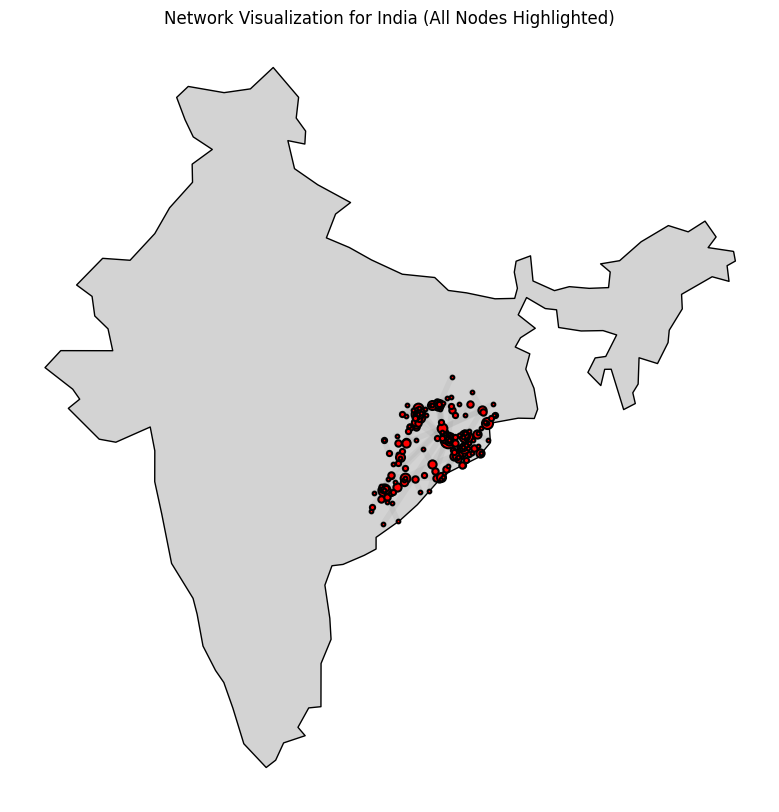

Community 1: frozenset({195, 199, 14, 15, 16, 81, 18, 19, 212, 85, 86, 20, 213, 87, 88, 89, 21, 22, 23, 95, 90, 91, 92, 94, 93, 96, 97, 98, 214, 24})
Community 2: frozenset({68, 5, 6, 69, 70, 71, 72, 11, 7, 73, 74, 9, 80, 77, 82, 83, 84, 78, 79, 221, 99, 100, 10, 75, 12, 76})
Community 3: frozenset({1, 2, 206, 207, 17, 219, 220, 39, 40, 42, 43, 44, 45, 178, 179, 180, 181, 182, 183, 184, 186})
Community 4: frozenset({65, 131, 132, 133, 134, 126, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 61, 125})
Community 5: frozenset({192, 193, 194, 196, 197, 198, 200, 201, 202, 203, 204, 215, 185, 187, 188, 189, 190, 191})
Community 6: frozenset({66, 67, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 56, 216})
Community 7: frozenset({30, 31, 160, 161, 162, 163, 164, 32, 166, 170, 171, 172, 173, 174, 175, 176, 177})
Community 8: frozenset({147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 28, 158, 29, 224, 157, 159, 46})
Community 9: frozenset({135, 136, 137, 138, 139, 1

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from networkx.algorithms import community
import geopandas as gpd

# Read the data from CSV files
nodes_df = pd.read_csv('/content/Node_ps - Sheet1.csv')
edges_df = pd.read_csv('/content/edge_ps - Sheet1.csv')

# Define bounding box for India (longitude, latitude)
india_bbox = (68.1, 7.8, 97.4, 35.5)

# Filter nodes and edges within the bounding box of India
nodes_in_india = nodes_df[(nodes_df['Longitude'] >= india_bbox[0]) & (nodes_df['Longitude'] <= india_bbox[2]) &
                          (nodes_df['Latitude'] >= india_bbox[1]) & (nodes_df['Latitude'] <= india_bbox[3])]
edges_in_india = edges_df[edges_df['Source'].isin(nodes_in_india['Id']) & edges_df['Target'].isin(nodes_in_india['Id'])]

# Create a new graph object
G = nx.Graph()

# Add nodes to the graph with their position set by their latitude and longitude
for index, row in nodes_in_india.iterrows():
    G.add_node(row['Id'], pos=(row['Longitude'], row['Latitude']))

# Add edges to the graph with weights
for index, row in edges_in_india.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

# Get positions
pos = nx.get_node_attributes(G, 'pos')

# Calculate node degrees
node_degrees = dict(G.degree())

# Plot the network with a map of India background
plt.figure(figsize=(12, 10))

# Load India map
india = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
india = india[india.name == "India"]

# Plot India map
india.plot(ax=plt.gca(), color='lightgray', edgecolor='black')

# Draw edges with reduced alpha for clarity
for edge in G.edges():
    u, v = edge
    x1, y1 = pos[u]
    x2, y2 = pos[v]
    plt.plot([x1, x2], [y1, y2], 'gray', alpha=0.1, linewidth=4)  # Reduce alpha for clarity

# Draw nodes with positions, sizes according to degree, and colours based on degree ranges
for node, position in pos.items():
    x, y = position
    node_degree = node_degrees[node]
    node_size = node_degree * 7  # Adjust the multiplier for desired node size
    plt.scatter(x, y, s=node_size, c='red', edgecolors='black', linewidths=1.5, zorder=2)  # Highlighted nodes in red

plt.title('Network Visualization for India (All Nodes Highlighted)')
plt.axis('off')  # Hide axis
plt.show()

# Find the communities using the greedy modularity method
communities = community.greedy_modularity_communities(G)

# Print the communities
for i, comm in enumerate(communities):
    print(f"Community {i+1}: {comm}")


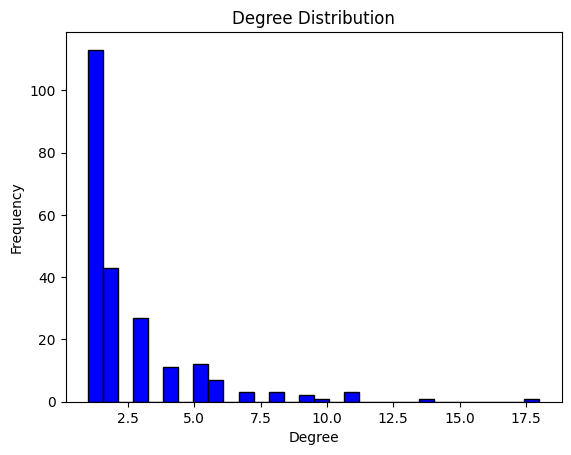

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read node and edge data
node_data = pd.read_csv('/content/Node_ps - Sheet1.csv')
edge_data = pd.read_csv('/content/edge_ps - Sheet1.csv')

# Create a graph object
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(node_data['Id'])

# Add edges to the graph
G.add_edges_from(zip(edge_data['Source'], edge_data['Target']))

# Degree distribution
degrees = [deg for node, deg in G.degree()]

# Plot degree distribution
plt.hist(degrees, bins=30, color='blue', edgecolor='black')
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()


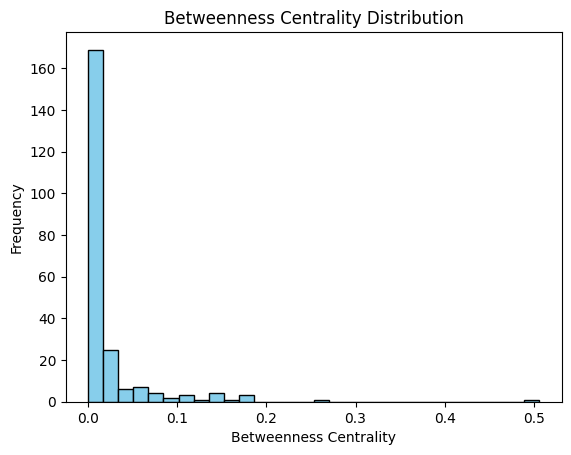

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read node and edge data
node_data = pd.read_csv('/content/Node_ps - Sheet1.csv')
edge_data = pd.read_csv('/content/edge_ps - Sheet1.csv')

# Create a graph object
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(node_data['Id'])

# Add edges to the graph
G.add_edges_from(zip(edge_data['Source'], edge_data['Target']))

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Plot betweenness centrality distribution
plt.hist(list(betweenness_centrality.values()), bins=30, color='skyblue', edgecolor='black')
plt.title('Betweenness Centrality Distribution')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.show()


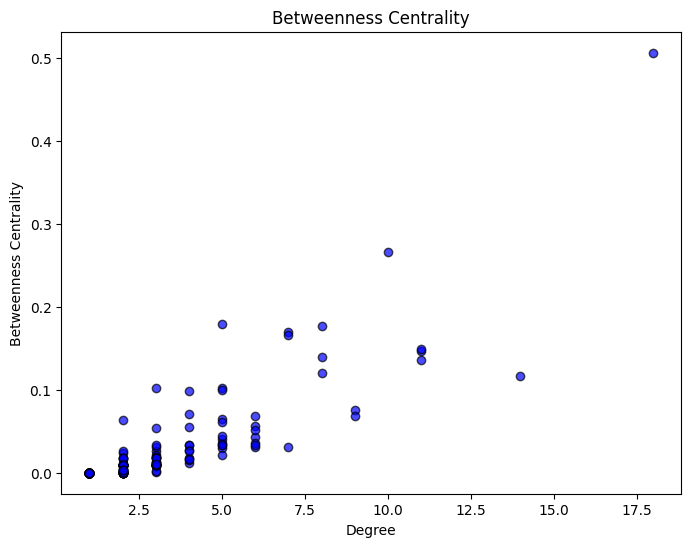

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read node and edge data
node_data = pd.read_csv('/content/Node_ps - Sheet1.csv')
edge_data = pd.read_csv('/content/edge_ps - Sheet1.csv')

# Create a graph object
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(node_data['Id'])

# Add edges to the graph
G.add_edges_from(zip(edge_data['Source'], edge_data['Target']))

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Get degrees and betweenness centrality values
degrees = dict(G.degree())
betweenness = {node: betweenness_centrality[node] for node in G.nodes()}

# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(degrees.values(), betweenness.values(), color='b', edgecolors='black', alpha=0.7)
plt.title('Betweenness Centrality')
plt.xlabel('Degree')
plt.ylabel('Betweenness Centrality')
# plt.grid(True)
plt.show()


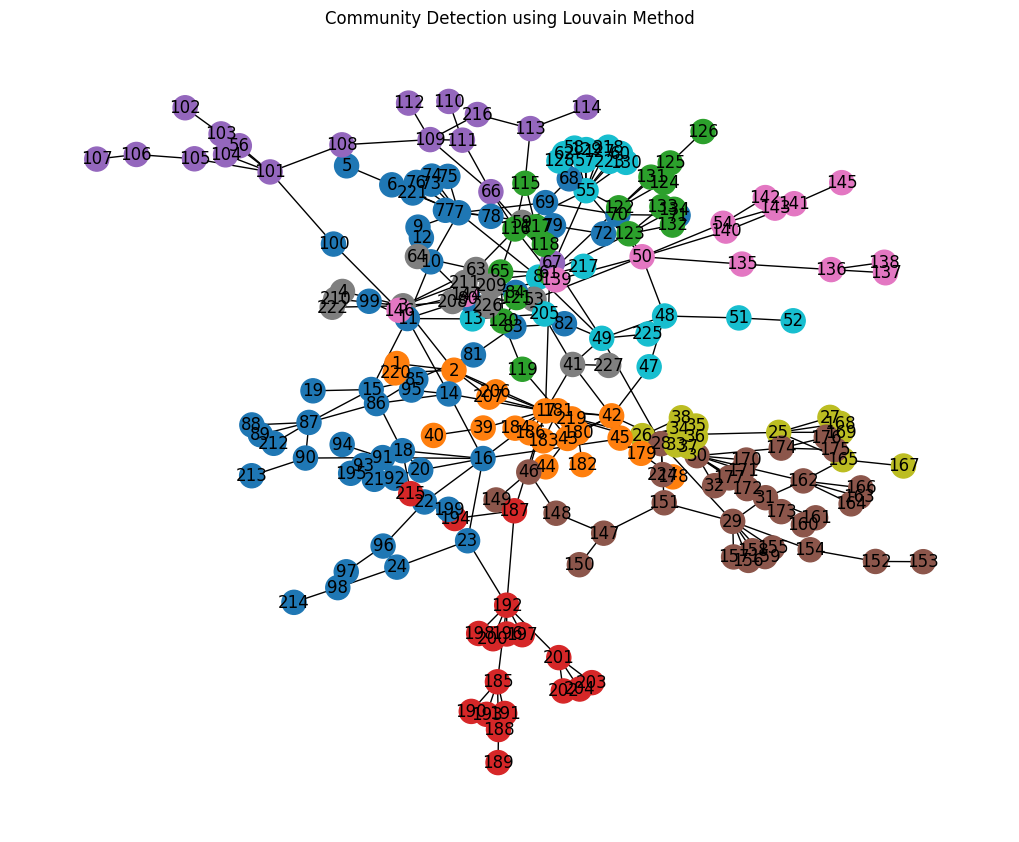

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

# Read node and edge data
node_data = pd.read_csv('/content/Node_ps - Sheet1.csv')
edge_data = pd.read_csv('/content/edge_ps - Sheet1.csv')

# Create a graph object
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(node_data['Id'])

# Add edges to the graph
G.add_edges_from(zip(edge_data['Source'], edge_data['Target']))

# Perform community detection using the Louvain method
communities = community.greedy_modularity_communities(G)

# Create a mapping of node to community
node_community_map = {}
for i, comm in enumerate(communities):
    for node in comm:
        node_community_map[node] = i

# Draw the graph with nodes colored by community
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # You can use other layout algorithms as well
nx.draw(G, pos, node_color=[node_community_map[node] for node in G.nodes()], cmap=plt.cm.tab10, with_labels=True)
plt.title('Community Detection using Louvain Method')
plt.show()


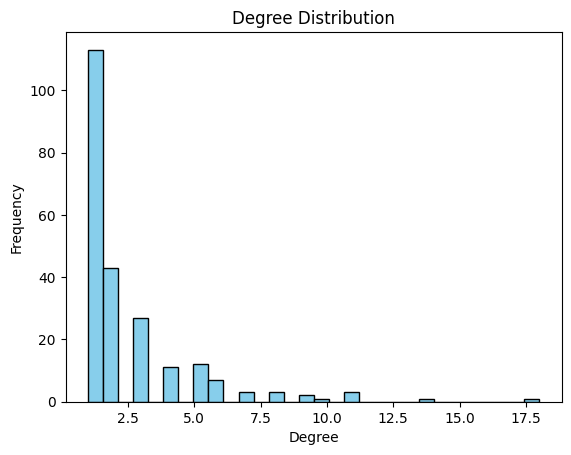

In [ ]:
import matplotlib.pyplot as plt

# Get the degree of each node
degrees = dict(G.degree())

# Plot the degree distribution
plt.hist(degrees.values(), bins=30, color='skyblue', edgecolor='black')
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()


In [ ]:
pip install powerlaw


Estimated power-law exponent (alpha): 3.3461710845875947
Standard error of the exponent estimate (sigma): 0.2784392810173337


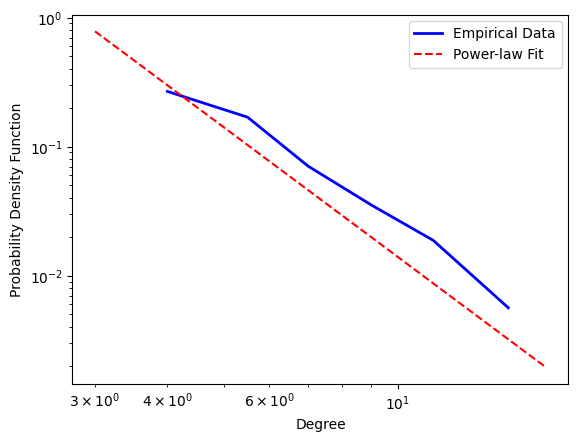

Loglikelihood ratio (R) comparing power law and exponential distributions: 1.7797026828902593
p-value of the likelihood ratio test: 0.07512463116969181
There is not enough evidence to conclude that the power-law distribution is a better fit than the exponential distribution.


In [ ]:
import powerlaw
import networkx as nx
import matplotlib.pyplot as plt

# Assuming G is your networkx graph
degrees = [degree for node, degree in G.degree() if degree > 0]  # Exclude nodes with degree 0

# Fit the degree distribution to a power-law distribution
fit = powerlaw.Fit(degrees, xmin=3)
alpha = fit.power_law.alpha
sigma = fit.power_law.sigma

print(f"Estimated power-law exponent (alpha): {alpha}")
print(f"Standard error of the exponent estimate (sigma): {sigma}")

# Plot the degree distribution and the power-law fit
fig = fit.plot_pdf(color='b', linewidth=2, label='Empirical Data')
fit.power_law.plot_pdf(color='r', linestyle='--', label='Power-law Fit')
plt.xlabel('Degree')
plt.ylabel('Probability Density Function')
plt.legend(loc='upper right')
plt.show()

# Calculate the goodness of fit
R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
print(f"Loglikelihood ratio (R) comparing power law and exponential distributions: {R}")
print(f"p-value of the likelihood ratio test: {p}")

# Interpretation of results
if p < 0.05:
    print("The power-law distribution is a significantly better fit than the exponential distribution.")
else:
    print("There is not enough evidence to conclude that the power-law distribution is a better fit than the exponential distribution.")


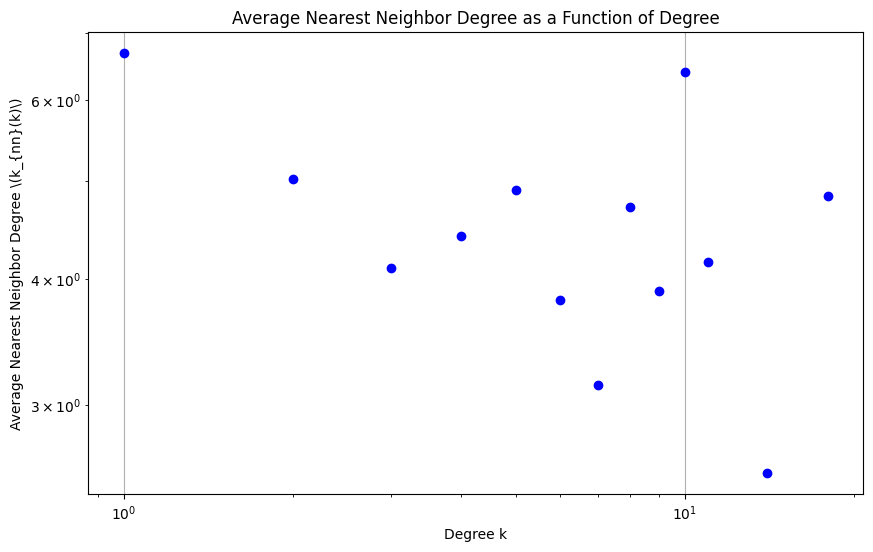

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Assuming G is your networkx graph

# Calculate the degree of each node
degrees = dict(G.degree())
k_values = np.array(list(degrees.values()))
unique_k = np.unique(k_values)

# Calculate k_nn for each node
k_nn = {node: np.mean([degrees[n] for n in G.neighbors(node)]) if len(list(G.neighbors(node))) > 0 else 0 for node in G.nodes()}

# Aggregate k_nn by k
k_nn_k = [np.mean([k_nn[node] for node in G.nodes() if degrees[node] == k]) for k in unique_k]

# Plot k_nn(k) versus k on a log-log scale
plt.figure(figsize=(10, 6))
plt.loglog(unique_k, k_nn_k, 'bo')
plt.xlabel('Degree k')
plt.ylabel('Average Nearest Neighbor Degree \(k_{nn}(k)\)')
plt.title('Average Nearest Neighbor Degree as a Function of Degree')
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from scipy import stats
import numpy as np

# Assuming G is your networkx graph
# Calculate node degree and betweenness centrality
node_degrees = np.array([degree for node, degree in G.degree()])
betweenness_values = np.array([value for node, value in nx.betweenness_centrality(G).items()])

# Calculate the Pearson correlation coefficient
correlation_coefficient, _ = stats.pearsonr(node_degrees, betweenness_values)

# Perform linear regression to get the line of best fit
slope, intercept, _, p_value, _ = stats.linregress(node_degrees, betweenness_values)

# Generate regression line values
line_values = slope * node_degrees + intercept

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(node_degrees, betweenness_values, color='blue', alpha=0.5, label='Node data')
plt.plot(node_degrees, line_values, 'r-', label=f' Correlation={correlation_coefficient:.2f}')
plt.xlabel('Degree (k)')
plt.ylabel('Betweenness Centrality')
plt.title('Degree vs. Betweenness Centrality with Linear Fit')
plt.legend()
plt.grid(True)
plt.show()

# Print the slope, correlation coefficient, and p-value
print(f"Slope: {slope:.2f}")
print(f"Pearson correlation coefficient: {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.2e}")


Slope: 0.02
Pearson correlation coefficient: 0.85
P-value: 6.22e-64
